<a href="https://colab.research.google.com/github/hsomaiya/machinelearning/blob/master/DL-Seq2Seq-AmznQA/Iteration-I/SelfCaseStudy_SmartReply_Iteration_I_GitHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Data Collection, Processing and Analysis

### 1. Importing libraries

In [ ]:
import gzip
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re

### 2. Downloading dataset

Steps:
1. Download CurlWget in Google Chrome Browser https://chrome.google.com/webstore/detail/curlwget/jmocjfidanebdlinpbcdkcmgdifblncg/related?hl=en
2. Watch the tutorial uploaded by author
3. Download 17 dataset from Questions with multiple answers section of Amazon question/answer data link http://jmcauley.ucsd.edu/data/amazon/qa/

In [ ]:
os.chdir('/content')

In [ ]:
!wget -qq --header="Host: jmcauley.ucsd.edu" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: http://jmcauley.ucsd.edu/data/amazon/qa/" --header="Cookie: __extfc=1" --header="Connection: keep-alive" "http://jmcauley.ucsd.edu/data/amazon/qa/icdm/QA_Automotive.json.gz" -c -O 'QA_Automotive.json.gz'
!wget -qq --header="Host: jmcauley.ucsd.edu" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: http://jmcauley.ucsd.edu/data/amazon/qa/" --header="Cookie: __extfc=1" --header="Connection: keep-alive" "http://jmcauley.ucsd.edu/data/amazon/qa/icdm/QA_Baby.json.gz" -c -O 'QA_Baby.json.gz'
!wget -qq --header="Host: jmcauley.ucsd.edu" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: http://jmcauley.ucsd.edu/data/amazon/qa/" --header="Cookie: __extfc=1" --header="Connection: keep-alive" "http://jmcauley.ucsd.edu/data/amazon/qa/icdm/QA_Beauty.json.gz" -c -O 'QA_Beauty.json.gz'
!wget -qq --header="Host: jmcauley.ucsd.edu" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: http://jmcauley.ucsd.edu/data/amazon/qa/" --header="Cookie: __extfc=1" --header="Connection: keep-alive" "http://jmcauley.ucsd.edu/data/amazon/qa/icdm/QA_Cell_Phones_and_Accessories.json.gz" -c -O 'QA_Cell_Phones_and_Accessories.json.gz'
!wget -qq --header="Host: jmcauley.ucsd.edu" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: http://jmcauley.ucsd.edu/data/amazon/qa/" --header="Cookie: __extfc=1" --header="Connection: keep-alive" "http://jmcauley.ucsd.edu/data/amazon/qa/icdm/QA_Clothing_Shoes_and_Jewelry.json.gz" -c -O 'QA_Clothing_Shoes_and_Jewelry.json.gz'
!wget -qq --header="Host: jmcauley.ucsd.edu" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: http://jmcauley.ucsd.edu/data/amazon/qa/" --header="Cookie: __extfc=1" --header="Connection: keep-alive" "http://jmcauley.ucsd.edu/data/amazon/qa/icdm/QA_Electronics.json.gz" -c -O 'QA_Electronics.json.gz'
!wget -qq --header="Host: jmcauley.ucsd.edu" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: http://jmcauley.ucsd.edu/data/amazon/qa/" --header="Cookie: __extfc=1" --header="Connection: keep-alive" "http://jmcauley.ucsd.edu/data/amazon/qa/icdm/QA_Grocery_and_Gourmet_Food.json.gz" -c -O 'QA_Grocery_and_Gourmet_Food.json.gz'
!wget -qq --header="Host: jmcauley.ucsd.edu" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: http://jmcauley.ucsd.edu/data/amazon/qa/" --header="Cookie: __extfc=1" --header="Connection: keep-alive" "http://jmcauley.ucsd.edu/data/amazon/qa/icdm/QA_Health_and_Personal_Care.json.gz" -c -O 'QA_Health_and_Personal_Care.json.gz'
!wget -qq --header="Host: jmcauley.ucsd.edu" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: http://jmcauley.ucsd.edu/data/amazon/qa/" --header="Cookie: __extfc=1" --header="Connection: keep-alive" "http://jmcauley.ucsd.edu/data/amazon/qa/icdm/QA_Home_and_Kitchen.json.gz" -c -O 'QA_Home_and_Kitchen.json.gz'
!wget -qq --header="Host: jmcauley.ucsd.edu" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: http://jmcauley.ucsd.edu/data/amazon/qa/" --header="Cookie: __extfc=1" --header="Connection: keep-alive" "http://jmcauley.ucsd.edu/data/amazon/qa/icdm/QA_Musical_Instruments.json.gz" -c -O 'QA_Musical_Instruments.json.gz'
!wget -qq --header="Host: jmcauley.ucsd.edu" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: http://jmcauley.ucsd.edu/data/amazon/qa/" --header="Cookie: __extfc=1" --header="Connection: keep-alive" "http://jmcauley.ucsd.edu/data/amazon/qa/icdm/QA_Office_Products.json.gz" -c -O 'QA_Office_Products.json.gz'
!wget -qq --header="Host: jmcauley.ucsd.edu" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: http://jmcauley.ucsd.edu/data/amazon/qa/" --header="Cookie: __extfc=1" --header="Connection: keep-alive" "http://jmcauley.ucsd.edu/data/amazon/qa/icdm/QA_Patio_Lawn_and_Garden.json.gz" -c -O 'QA_Patio_Lawn_and_Garden.json.gz'
!wget -qq --header="Host: jmcauley.ucsd.edu" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: http://jmcauley.ucsd.edu/data/amazon/qa/" --header="Cookie: __extfc=1" --header="Connection: keep-alive" "http://jmcauley.ucsd.edu/data/amazon/qa/icdm/QA_Pet_Supplies.json.gz" -c -O 'QA_Pet_Supplies.json.gz'
!wget -qq --header="Host: jmcauley.ucsd.edu" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: http://jmcauley.ucsd.edu/data/amazon/qa/" --header="Cookie: __extfc=1" --header="Connection: keep-alive" "http://jmcauley.ucsd.edu/data/amazon/qa/icdm/QA_Sports_and_Outdoors.json.gz" -c -O 'QA_Sports_and_Outdoors.json.gz'
!wget -qq --header="Host: jmcauley.ucsd.edu" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: http://jmcauley.ucsd.edu/data/amazon/qa/" --header="Cookie: __extfc=1" --header="Connection: keep-alive" "http://jmcauley.ucsd.edu/data/amazon/qa/icdm/QA_Tools_and_Home_Improvement.json.gz" -c -O 'QA_Tools_and_Home_Improvement.json.gz'
!wget -qq --header="Host: jmcauley.ucsd.edu" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: http://jmcauley.ucsd.edu/data/amazon/qa/" --header="Cookie: __extfc=1" --header="Connection: keep-alive" "http://jmcauley.ucsd.edu/data/amazon/qa/icdm/QA_Toys_and_Games.json.gz" -c -O 'QA_Toys_and_Games.json.gz'
!wget -qq --header="Host: jmcauley.ucsd.edu" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: http://jmcauley.ucsd.edu/data/amazon/qa/" --header="Cookie: __extfc=1" --header="Connection: keep-alive" "http://jmcauley.ucsd.edu/data/amazon/qa/icdm/QA_Video_Games.json.gz" -c -O 'QA_Video_Games.json.gz'

In [ ]:
rootdir='/content'

In [ ]:
from datetime import datetime

def timer(start_time=None):
  """ 
  Measure the block's execution time using the clock 
  """
  if not start_time:
    start_time = datetime.now()
    return start_time
  elif start_time:
    thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
    tmin, tsec = divmod(temp_sec, 60)
    print('Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

### 3. Extracting data

In [ ]:
def parseJson(mFile):
  """ 
  Parses (unzip and read) the *.json.gz file 
  """
  gzipFile = gzip.open(mFile, 'rb')
  for line in gzipFile:
    yield eval(line)

def showFileContents(dir, totalLinesLimit=1):
  """ 
  Displays the contents of the *.json.gz file
  If the totalLinesLimit is greater than single
  *.json.gz file, then read remaining lines 
  from the next *.json.gz file 
  """
  
  if totalLinesLimit < 1:
    print("Invalid number of totalLinesLimit")
    return

  for mFile in sorted(os.listdir(rootdir)):
    linesCount = 0
    if mFile.endswith(".json.gz"):
      print("Viewing file:", mFile)
      jsonFile = parseJson(mFile)
      for line in jsonFile: 
        print(line)
        linesCount +=1
        if linesCount == totalLinesLimit:
          return
          
def createDataFrame(dir, retain_additional_info=False):
  """ 
  Creates and returns a pandas.Dataframe from all *.json.gz files.
  If the flag retain_additional_info is True, this function
  will collect additional data from all the *.json.gz file, 
  and return this along with the pandas.Dataframe 
  """
  if retain_additional_info:
    info = dict()
    numOfAns = dict()
    quesType = dict()
    quesOneWord = dict()
    quesTwoWords = dict()
    quesLen = dict()
    ansType = dict()
    ansScore = dict()
    ansHelpful = dict()
    ansOneWord = dict()
    ansTwoWords = dict()
    ansLen = dict()

  questions = list()
  answers = list()
  questionsType = list()

  # For each file
  for mFile in sorted(os.listdir(rootdir)):
    # If file is a json.gz file
    if mFile.endswith(".json.gz"):
      start_time = timer()
      print("Processing file:", mFile)
      # Parse the file
      jsonFile = parseJson(mFile)
      # For each line in the parsed file
      for line in jsonFile: 
        # For each question present in the line
        for j in range(len(line.get('questions'))):  
          # Get the question text
          question = line.get('questions')[j].get('questionText')
          qtype =  line.get('questions')[j].get('questionType')

          if retain_additional_info:
            # Collecting additional info
            nAns = len(line.get('questions')[j].get('answers'))
            
            qlen = len(question)
            qsplit = question.split(' ')
            # Storing additional info in the dictionary
            if qlen == 1:
              quesOneWord[tuple(qsplit)] = quesOneWord.get(tuple(qsplit), 0) + 1
            else:
              quesTwoWords[tuple(qsplit[:2])] = quesTwoWords.get(tuple(qsplit[:2]), 0) + 1
            
            numOfAns[nAns] = numOfAns.get(nAns, 0) + 1
            quesType[qtype] = quesType.get(qtype, 0) + 1
            quesLen[qlen] = quesLen.get(qlen, 0) + 1        

          # For each answer to the question
          for i in range(nAns):           
            # Store the question
            questions.append(question)
            # Store the question type
            questionsType.append(qtype)
            # Store the answer
            answer = line.get('questions')[j].get('answers')[i].get('answerText')
            answers.append(answer)
            
            if retain_additional_info:
              # Collecting additional info
              atype =  line.get('questions')[j].get('answers')[i].get('answerType')
              aScore =  line.get('questions')[j].get('answers')[i].get('answerScore')
              aHelpful =  line.get('questions')[j].get('answers')[i].get('helpful')
              alen = len(answer)
              asplit = answer.split(' ')
              # Storing additional info in the dictionary
              ansLen[alen] = ansLen.get(alen, 0) + 1
              if alen == 1:
                ansOneWord[tuple(asplit)] = ansOneWord.get(tuple(asplit), 0) + 1
              else:
                ansTwoWords[tuple(asplit[:2])] = ansTwoWords.get(tuple(asplit[:2]), 0) + 1

              if atype:
                ansType[atype] = ansType.get(atype, 0) + 1
              else:
                ansType['Undefined'] = ansType.get('Undefined', 0) + 1
              
              if aScore:
                ansScore[aScore] = ansScore.get(aScore, 0) + 1
              else:
                ansScore['Undefined'] = ansScore.get('Undefined', 0) + 1
              
              if aHelpful:
                # aHelpful is a list and a list is mutable and therefore non-hashable. 
                # Dictionary keys need to be hashable. 
                ansHelpful[tuple(aHelpful)] = ansHelpful.get(tuple(aHelpful), 0) + 1
              else:
                ansHelpful['Undefined'] = ansHelpful.get('Undefined', 0) + 1
                   
      timer(start_time)
  if retain_additional_info:
    info['numOfAns'] = numOfAns
    info['quesType'] = quesType
    info['ansType'] = ansType
    info['ansHelpful'] = ansHelpful
    info['ansScore'] = ansScore
    info['quesLen'] = quesLen
    info['ansLen'] = ansLen
    info['quesOneWord'] = quesOneWord
    info['quesTwoWords'] = quesTwoWords
    info['ansOneWord'] = ansOneWord
    info['ansTwoWords'] = ansTwoWords
    return pd.DataFrame(list(zip(questions, questionsType, answers)), columns =['Questions', 'Questions Type', 'Answers']), info
  else:
    return pd.DataFrame(list(zip(questions, questionsType, answers)), columns =['Questions', 'Questions Type','Answers'])

#### 3.1. Viewing file contents

In [ ]:
showFileContents(rootdir)

Viewing file: QA_Automotive.json.gz
{'asin': 'B000182CPM', 'questions': [{'questionType': 'open-ended', 'askerID': 'A26FXHGNE8HHIU', 'questionTime': 'December 29, 2014', 'questionText': 'Will these fit my 2002 Ford F150 XLT?', 'answers': [{'answerText': "It's all custom mounting, where there's a will there's a way, don't see why not, figure 15minutes per mud flap, there isn't any hardware included just the stamped sheet metal pieces", 'answererID': 'AQZ8QLPPYA359', 'answerTime': 'December 29, 2014', 'helpful': [0, 0]}, {'answerText': 'You will need to drill another hole in Mud flap & bed frame for added stability.  the added bolt & nut makes it a tighter fit, you only get two existing holes on the bed frame with plastic mud flaps when you bought the truck.  These Dee Zee flaps are much heavier than the plastic/rubber flaps originally provided on truck.', 'answererID': 'A246IDL7UXVCQO', 'answerTime': 'December 29, 2014', 'helpful': [0, 0]}]}, {'questionType': 'yes/no', 'askerID': 'A365S

#### 3.2. Creating a dataframe and get additional information about the data

In [ ]:
start_time = timer()
df, info = createDataFrame(rootdir, retain_additional_info=True)
timer(start_time)

Processing file: QA_Automotive.json.gz
Time taken: 0 hours 0 minutes and 7.82 seconds.
Processing file: QA_Baby.json.gz
Time taken: 0 hours 0 minutes and 2.83 seconds.
Processing file: QA_Beauty.json.gz
Time taken: 0 hours 0 minutes and 4.3 seconds.
Processing file: QA_Cell_Phones_and_Accessories.json.gz
Time taken: 0 hours 0 minutes and 7.79 seconds.
Processing file: QA_Clothing_Shoes_and_Jewelry.json.gz
Time taken: 0 hours 0 minutes and 2.16 seconds.
Processing file: QA_Electronics.json.gz
Time taken: 0 hours 0 minutes and 31.09 seconds.
Processing file: QA_Grocery_and_Gourmet_Food.json.gz
Time taken: 0 hours 0 minutes and 2.1 seconds.
Processing file: QA_Health_and_Personal_Care.json.gz
Time taken: 0 hours 0 minutes and 8.8 seconds.
Processing file: QA_Home_and_Kitchen.json.gz
Time taken: 0 hours 0 minutes and 20.45 seconds.
Processing file: QA_Musical_Instruments.json.gz
Time taken: 0 hours 0 minutes and 2.45 seconds.
Processing file: QA_Office_Products.json.gz
Time taken: 0 hours 

#### 3.3. Viewing the dataframe information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4019744 entries, 0 to 4019743
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   Questions       object
 1   Questions Type  object
 2   Answers         object
dtypes: object(3)
memory usage: 92.0+ MB


#### 3.4. Displaying the contents of a dataframe

In [ ]:
df

,Questions,Questions Type,Answers
0,Will these fit my 2002 Ford F150 XLT?,open-ended,"It's all custom mounting, where there's a will..."
1,Will these fit my 2002 Ford F150 XLT?,open-ended,You will need to drill another hole in Mud fla...
2,is the hardware for installation included,yes/no,"It's been a while since I installed them, but ..."
3,is the hardware for installation included,yes/no,1 pair rear flaps and mounting hardware.
4,is the hardware for installation included,yes/no,I didn't buy these for myself I bought them fo...
...,...,...,...
4019739,Would it work on a lap top,open-ended,theres specs on the game requirements on the a...
4019740,Would it work on a lap top,open-ended,Short answer yes it will. It all depends on yo...
4019741,Would it work on a lap top,open-ended,yes it would work great on a lap top
4019742,can u mod this one,yes/no,Yes you can. I personally download from spinti...


#### 3.4. Displaying the additional information captured

In [ ]:
for k, v in info.items():
  print(k,len(v))

numOfAns 10
quesType 2
ansType 4
ansHelpful 1063
ansScore 9997
quesLen 1933
ansLen 5714
quesOneWord 21
quesTwoWords 76785
ansOneWord 62
ansTwoWords 487229


#### 3.5. Visualizing bar plots of the additional information captured

In [ ]:
def generateBarPlot(mDict, title, xlabel, ylabel, top=None, reverse=True, ha='center'):
  """ 
  Generates a bar plot from a dictionary.
  If top is specified, then this function first sorts the dictionary
  in reverse order and selects 'top' values. 
  """
  if top is None:
    plt.bar(list(mDict.keys()), mDict.values(), align='center')
  else:
    mDictSorted = sorted(mDict.items(), key=lambda x: x[1], reverse=reverse)[:top]
    plt.bar(range(len(mDictSorted)), [val[1] for val in mDictSorted])
    plt.xticks(range(len(mDictSorted)), [val[0] for val in mDictSorted], ha=ha)
    plt.xticks(rotation=70)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

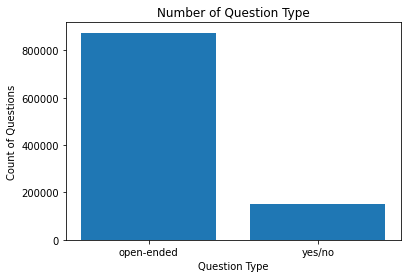

In [ ]:
generateBarPlot(info['quesType'], 'Number of Question Type', 'Question Type', 'Count of Questions')

There are more open-ended questions compared to yes/no.

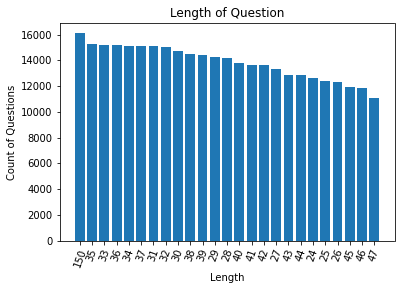

In [ ]:
generateBarPlot(info['quesLen'], 'Length of Question', 'Length', 'Count of Questions', top=25)

There are many questions with length = 150 and most of the questions have length greater than 20.

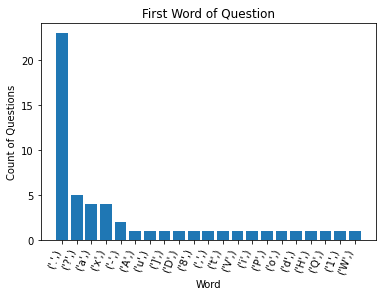

In [ ]:
generateBarPlot(info['quesOneWord'], 'First Word of Question', 'Word', 'Count of Questions',top=25, ha='right')

There are some questions in the uncleaned dataset with length = 1 and the only word in the question is a junk word.

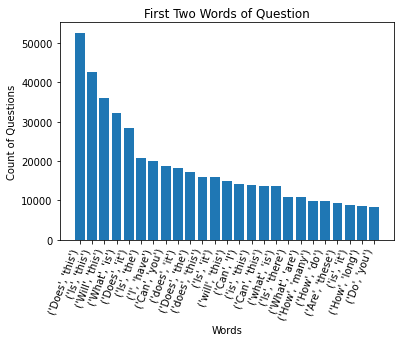

In [ ]:
generateBarPlot(info['quesTwoWords'], 'First Two Words of Question', 'Words', 'Count of Questions', top=25, ha='right')

There are many questions that starts with the same first two words.

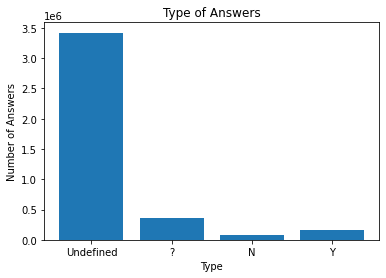

In [ ]:
generateBarPlot(info['ansType'], 'Type of Answers', 'Type', 'Number of Answers')

Most of the answers have no 'answerType' defined.

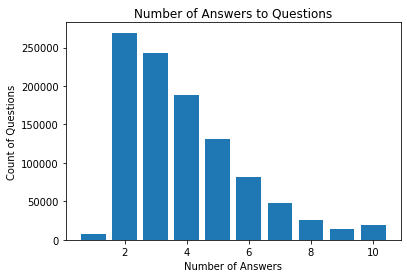

In [ ]:
generateBarPlot(info['numOfAns'], 'Number of Answers to Questions', 'Number of Answers', 'Count of Questions')

Most of the questions have more than one answer.

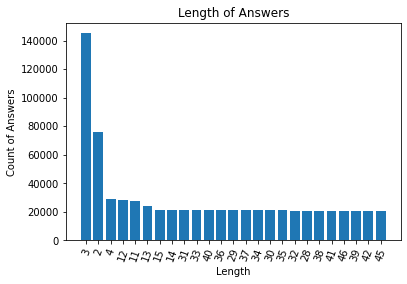

In [ ]:
generateBarPlot(info['ansLen'], 'Length of Answers', 'Length', 'Count of Answers', top=25)

Most of the answers have length greater than or equal to two.

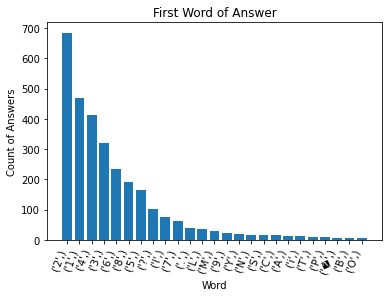

In [ ]:
generateBarPlot(info['ansOneWord'], 'First Word of Answer', 'Word', 'Count of Answers',top=25, ha='right')

There are some answers in the uncleaned dataset with length = 1 and the only word in the answer is a junk word.

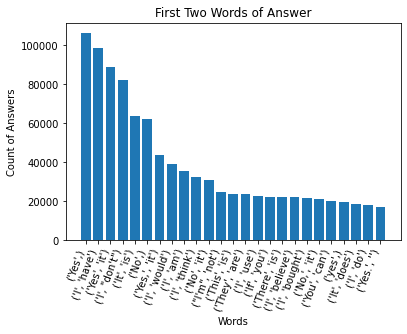

In [ ]:
generateBarPlot(info['ansTwoWords'], 'First Two Words of Answer', 'Words', 'Count of Answers', top=25, ha='right')

There are many answers that starts with the same first two words.

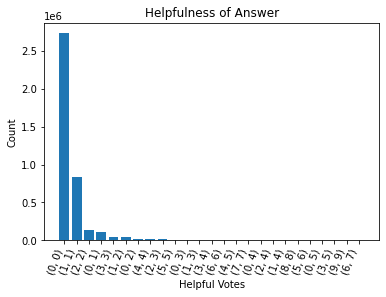

In [ ]:
generateBarPlot(info['ansHelpful'], 'Helpfulness of Answer', 'Helpful Votes', 'Count', top=25, ha='right')

Most of the answers have received 0 upvotes and 0 downvotes.

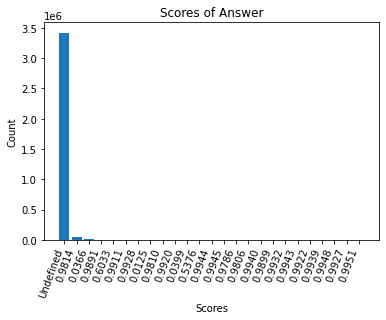

In [ ]:
generateBarPlot(info['ansScore'], 'Scores of Answer', 'Scores', 'Count', top=25, ha='right')

Most of the answers have not been scored as they do not have 
'answerScore' in the raw dataset.

#### 3.6. Preprocessing the dataset

In [ ]:
def decontracted(phrase):
    """ 
    Performs decontraction on the phrase.
    """
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
def removeHTML(text):
  """ 
  Removes HTML tags from the text.
  """
  return re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))','', text)

In [ ]:
def preprocess(corpus):
  """ 
  Cleans and removes unwanted characters from the corpus. 
  """
  preprocessed = list()
  for sentence in corpus:
    sent = removeHTML(sentence)
    sent = decontracted(sentence)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    preprocessed.append(sent.lower().strip())
  return preprocessed

In [ ]:
start_time = timer()
df['Questions'] = preprocess(df['Questions'])
timer(start_time)

Time taken: 0 hours 1 minutes and 14.82 seconds.


In [ ]:
start_time = timer()
df['Answers'] = preprocess(df['Answers'])
timer(start_time)

Time taken: 0 hours 1 minutes and 57.88 seconds.


#### 3.7. Processing the duplicates

In [ ]:
print("Number of duplicates:", df.duplicated().sum())

Number of duplicates: 454432


In [ ]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
print("Shape of data after removing the duplicates:", df.shape)

Shape of data after removing the duplicates: (3565312, 3)


#### 3.8. Finding length of questions and answers after preprocessing

In [ ]:
df['Question Length'] = df['Questions'].str.split().apply(len)

In [ ]:
df['Answer Length'] = df['Answers'].str.split().apply(len)

In [ ]:
df

,Questions,Questions Type,Answers,Question Length,Answer Length
0,will these fit my 2002 ford f150 xlt,open-ended,it is all custom mounting where there is a wil...,8,36
1,will these fit my 2002 ford f150 xlt,open-ended,you will need to drill another hole in mud fla...,8,59
2,is the hardware for installation included,yes/no,it is been a while since i installed them but ...,6,19
3,is the hardware for installation included,yes/no,1 pair rear flaps and mounting hardware,6,7
4,is the hardware for installation included,yes/no,i did not buy these for myself i bought them f...,6,27
...,...,...,...,...,...
3565307,would it work on a lap top,open-ended,theres specs on the game requirements on the a...,7,25
3565308,would it work on a lap top,open-ended,short answer yes it will it all depends on you...,7,72
3565309,would it work on a lap top,open-ended,yes it would work great on a lap top,7,9
3565310,can u mod this one,yes/no,yes you can i personally download from spintir...,5,68


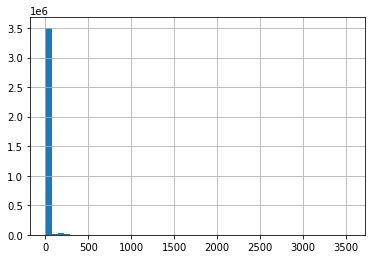

In [ ]:
df['Question Length'].hist(bins=50)

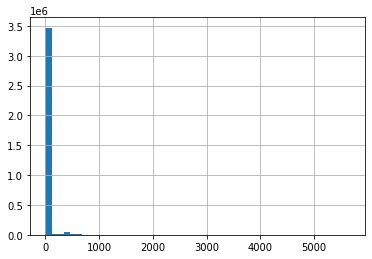

In [ ]:
df['Answer Length'].hist(bins=50)

#### 3.9. Removing some entires

In [ ]:
print('Total number of entries:', df.shape[0])
print('Maximum question length:', df['Question Length'].max())
print('Maximum answer length:', df['Answer Length'].max())
print('Number of questions with no answers after preprocessing:',df[df['Answer Length'] < 1].shape[0])
print('Number of answers with no questions after preprocessing:',df[df['Question Length'] < 1].shape[0])

Total number of entries: 3565312
Maximum question length: 3547
Maximum answer length: 5666
Number of questions with no answers after preprocessing: 369
Number of answers with no questions after preprocessing: 209


##### 3.9.1. Removing empty answers

In [ ]:
df = df[df['Answer Length'] > 0]
df.shape

(3564943, 5)

##### 3.9.2. Removing empty questions

In [ ]:
df = df[df['Question Length'] > 0]
df.shape

(3564734, 5)

##### 3.9.3. Removing answers of length more than three

In [ ]:
df = df[df['Answer Length'] < 4]
df.shape

(320593, 5)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
print('Total number of entries:', df.shape[0])
print('Maximum question length:', df['Question Length'].max())
print('Maximum answer length:', df['Answer Length'].max())

Total number of entries: 320593
Maximum question length: 1546
Maximum answer length: 3


In [ ]:
df['Questions Type'].value_counts()

open-ended    261134
yes/no         59459
Name: Questions Type, dtype: int64

##### 3.9.4. Removing questions of length more than eleven

In [ ]:
print("Average question length:", df['Question Length'].mean())

Average question length: 11.3684578265901


In [ ]:
df = df[df["Question Length"] < 12]
df.reset_index(drop=True, inplace=True)

In [ ]:
print("Shape of dataset:", df.shape)

Shape of dataset: (213791, 5)


In [ ]:
# Viewing an entry whose question length is eleven
df.iloc[7,0] 
# Output 
# is this a set or do i have to order 2

In [ ]:
df.head(60)

,Questions,Questions Type,Answers,Question Length,Answer Length
0,is the hardware for installation included,yes/no,no,6,1
1,will they fit 2014 mazda 3 sport,yes/no,no,7,1
2,will they fit 2014 mazda 3 sport,yes/no,nope,7,1
3,do they fit a 1998 gmc sierra 3 door,open-ended,yes,9,1
4,will this product work with a 1995 buick rivera,yes/no,yes it will,9,3
5,will this work on the generation 1 alpha,open-ended,yes it will,8,3
6,is it easy to install,yes/no,very easy,5,2
7,is this a set or do i have to order 2,open-ended,order 2,11,2
8,it comes with door assembly,open-ended,yesterday,5,1
9,is this a 12 volt igitor or 110,open-ended,yes 12 volt,8,3


#### 3.10. Saving the dataset

In [ ]:
df.to_csv('amazonqa_preprocessed.csv', index=False)

## Train and Evaulate Models

### 1. Importing libraries

In [ ]:
# Caution: Save all the data and then install as you need to restart the runtime
!pip install -qq tf-nightly==2.4.0-dev20200815

     |████████████████████████████████| 324.0MB 53kB/s 
     |████████████████████████████████| 6.8MB 42.7MB/s 
     |████████████████████████████████| 460kB 56.7MB/s 


In [ ]:
from nltk.translate.bleu_score import corpus_bleu
from numpy import argmax, array, asarray, zeros, save, load
import random
from sklearn.model_selection import train_test_split
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tqdm import tqdm

In [ ]:
print(tf.__version__)

2.4.0-dev20200815


In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2778770363263105402
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 16934503265440686773
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 6273840346236124179
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14611321984
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17919152378396512523
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [ ]:
SEED = 42
os.environ['PYTHONHASHSEED']=str(SEED)
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'  # TF 2.1+
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

### 2. Read the dataset

In [ ]:
os.chdir('/content')

In [ ]:
df = pd.read_csv('amazonqa_preprocessed.csv')

### 3. Modify the dataset

In [ ]:
df['Answers'] = df['Answers'].apply(lambda x : '<start> '+ x + ' <end>')
df['QA'] = df['Questions'].astype(str) + ' ' + df['Answers'].astype(str)
df

,Questions,Questions Type,Answers,Question Length,Answer Length,QA
0,is the hardware for installation included,yes/no,<start> no <end>,6,1,is the hardware for installation included <sta...
1,will they fit 2014 mazda 3 sport,yes/no,<start> no <end>,7,1,will they fit 2014 mazda 3 sport <start> no <end>
2,will they fit 2014 mazda 3 sport,yes/no,<start> nope <end>,7,1,will they fit 2014 mazda 3 sport <start> nope ...
3,do they fit a 1998 gmc sierra 3 door,open-ended,<start> yes <end>,9,1,do they fit a 1998 gmc sierra 3 door <start> y...
4,will this product work with a 1995 buick rivera,yes/no,<start> yes it will <end>,9,3,will this product work with a 1995 buick river...
...,...,...,...,...,...,...
213786,does this game have a multiplayer mode,open-ended,<start> no <end>,7,1,does this game have a multiplayer mode <start>...
213787,does it fit to the ps4,yes/no,<start> yep <end>,6,1,does it fit to the ps4 <start> yep <end>
213788,does it fit to the ps4,yes/no,<start> yes <end>,6,1,does it fit to the ps4 <start> yes <end>
213789,would it work on a lap top,open-ended,<start> yes it will <end>,7,3,would it work on a lap top <start> yes it will...


In [ ]:
df.to_csv('amazonqa_preprocessed_modified.csv', index=False)

In [ ]:
df = pd.read_csv('amazonqa_preprocessed_modified.csv')

### 4. Split the dataset

In [ ]:
enc_in_train, enc_in_test, qa_train, qa_test, dec_in_train, dec_in_test = train_test_split(df['Questions'], df['QA'], df['Answers'], test_size=0.005, random_state=SEED)
enc_in_train, enc_in_val, qa_train, qa_val, dec_in_train, dec_in_val = train_test_split( enc_in_train, qa_train, dec_in_train, test_size=0.2, random_state=SEED)

### 5. Tokenize the text sequences

In [ ]:
def create_tokenizer(lines):
  """
    Fit a tokenizer
  """
  tokenizer = Tokenizer(filters='')
  tokenizer.fit_on_texts(lines)
  return tokenizer

In [ ]:
qa_tokenizer = create_tokenizer(df['QA'])
qa_vocab_size = len(qa_tokenizer.word_index) + 1
ques_length = df['Question Length'].max()
ans_length = df['Answer Length'].max()
print('Questions and Answers Vocabulary Size: %d' % qa_vocab_size)
print('Questions Max Length: %d' % (ques_length))
print('Answers Max Length: %d' % (ans_length))

Questions and Answers Vocabulary Size: 41397
Questions Max Length: 11
Answers Max Length: 3


In [ ]:
import pickle

# saving tokenizer
with open('qa_tokenizer', 'wb') as handle:
    pickle.dump(qa_tokenizer, handle)

### 6. Encode and pad the text sequences

In [ ]:
def encode_sequences(tokenizer, length, lines):
  """
    Encode and pad sequences
  """
  # Integer encode sequences
  X = tokenizer.texts_to_sequences(lines)
  # Pad sequences with 0 values
  X = pad_sequences(X, maxlen=length, padding='post')
  return X

In [ ]:
print('>> Before')
print('> Shape')
print('enc_in_train:', enc_in_train.shape)
print('enc_in_val:', enc_in_val.shape)
print('enc_in_test:', enc_in_test.shape)
print('dec_in_train:', dec_in_train.shape)
print('dec_in_val:', dec_in_val.shape)
print('dec_in_test:', dec_in_test.shape)

enc_in_train = encode_sequences(qa_tokenizer, ques_length, enc_in_train)
enc_in_val = encode_sequences(qa_tokenizer, ques_length, enc_in_val)
enc_in_test = encode_sequences(qa_tokenizer, ques_length, enc_in_test)

dec_in_train = encode_sequences(qa_tokenizer, ans_length+2, dec_in_train)
dec_in_val = encode_sequences(qa_tokenizer, ans_length+2, dec_in_val)
dec_in_test = encode_sequences(qa_tokenizer, ans_length+2, dec_in_test)

print('\n\n>> After')
print('> Shape')
print('enc_in_train:', enc_in_train.shape)
print('enc_in_val:', enc_in_val.shape)
print('enc_in_test:', enc_in_test.shape)
print('dec_in_train:', dec_in_train.shape)
print('dec_in_val:', dec_in_val.shape)
print('dec_in_test:', dec_in_test.shape)

>> Before
> Shape
enc_in_train: (170177,)
enc_in_val: (42545,)
enc_in_test: (1069,)
dec_in_train: (170177,)
dec_in_val: (42545,)
dec_in_test: (1069,)


>> After
> Shape
enc_in_train: (170177, 11)
enc_in_val: (42545, 11)
enc_in_test: (1069, 11)
dec_in_train: (170177, 5)
dec_in_val: (42545, 5)
dec_in_test: (1069, 5)


### 7. Create lookup maps

In [ ]:
qa_vocab = qa_tokenizer.word_index
word2id = dict()
id2word = dict()
for k, v in qa_vocab.items():
    word2id[k] = v
    id2word[v] = k
print('Size of word2id:', len(word2id))
print('Size of id2word:', len(id2word))

Size of word2id: 41396
Size of id2word: 41396


### 8. Load pretrained word embeddings

In [ ]:
!wget -qq https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip

In [ ]:
!unzip -qq wiki-news-300d-1M.vec.zip

In [ ]:
# load the pre-trained word-embedding vectors 
embeddings_index = dict()
for i, line in enumerate(open('wiki-news-300d-1M.vec')):
    values = line.split()
    embeddings_index[values[0]] = asarray(values[1:], dtype='float32')
    
print('Found %s word vectors' % len(embeddings_index))

Found 999995 word vectors


### 9. Generate word embeddings

In [ ]:
# create token-embedding mapping
embedding_matrix = zeros((qa_vocab_size, 300))
for word, i in qa_vocab.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        
print(embedding_matrix.shape)

(41397, 300)


In [ ]:
save('embedding_matrix', embedding_matrix)

In [ ]:
embedding_matrix = load('embedding_matrix.npy')

### 10. Modeling

#### 10.1. Baseline Model

##### 10.1.1. Create a tf.data dataset

In [ ]:
BATCH_SIZE = 512
embedding_dim = 300
units = 1024
max_ques_length = ques_length
max_ans_length = ans_length + 2 # +2 for start and end token

In [ ]:
BUFFER_SIZE_TRAIN = len(enc_in_train)
steps_per_epoch_train = BUFFER_SIZE_TRAIN//BATCH_SIZE

dataset_train = tf.data.Dataset.from_tensor_slices((enc_in_train, dec_in_train)).shuffle(BUFFER_SIZE_TRAIN)
dataset_train = dataset_train.batch(BATCH_SIZE, drop_remainder=True)

In [ ]:
BUFFER_SIZE_VAL = len(enc_in_val)
steps_per_epoch_val = BUFFER_SIZE_VAL//BATCH_SIZE

dataset_val = tf.data.Dataset.from_tensor_slices((enc_in_val, dec_in_val)).shuffle(BUFFER_SIZE_VAL)
dataset_val = dataset_val.batch(BATCH_SIZE, drop_remainder=True)

In [ ]:
example_input_batch, example_target_batch = next(iter(dataset_train))
example_input_batch.shape, example_target_batch.shape

(TensorShape([512, 11]), TensorShape([512, 5]))

##### 10.1.2. Write the encoder and decoder model

In [ ]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
        super(Encoder, self).__init__()
        self.batch_sz = batch_sz
        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_ques_length, 
                                                   weights=[embedding_matrix], trainable=False)
        self.lstm = tf.keras.layers.LSTM(self.enc_units,
                                   return_sequences=True,
                                   return_state=True)
        
    def call(self, x, hidden):
        # x shape == (batch_size, max_ques_length)
        x = self.embedding(x)
        # x shape == (batch_size, max_ques_length, embedding_dim)
        output, state_h, state_c = self.lstm(x, initial_state = hidden)
        # output shape == (batch_size, max_ques_length, enc_units)
        # state_h shape == (batch_size, enc_units)
        # state_c shape == (batch_size, enc_units)
        return output, state_h, state_c

    def initialize_hidden_state(self):
        return (tf.zeros((self.batch_sz, self.enc_units)),
                tf.zeros((self.batch_sz, self.enc_units)))

class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
        super(Decoder, self).__init__()
        self.batch_sz = batch_sz
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_ans_length, 
                                                   weights=[embedding_matrix], trainable=False)
        self.lstm = tf.keras.layers.LSTM(self.dec_units,
                                   return_sequences=True,
                                   return_state=True)
        self.fc = tf.keras.layers.Dense(vocab_size)
        
    def call(self, x, hidden, enc_output):
        # x shape == (batch_size, 1)
        # hidden shape == tuple of two (batch_size, enc_units)
        # enc_output shape == (batch_size, max_ques_length, enc_units)

        # x shape after passing through embedding == (batch_size, 1, embedding_dim)
        x = self.embedding(x)

        # passing the concatenated vector to the LSTM
        output, state_h, state_c = self.lstm(x, initial_state=hidden)
        # output shape == (batch_size, 1, dec_units)
        # state_h shape == (batch_size, dec_units)
        # state_c shape == (batch_size, dec_units)
 
        output = tf.reshape(output, (-1, output.shape[2]))
        # output shape == (batch_size * 1, dec_units)
        
        x = self.fc(output)
        # output shape == (batch_size, vocab)
        
        return x, state_h, state_c

        
    def initialize_hidden_state(self):
        return (tf.zeros((self.batch_sz, self.dec_units)),
                tf.zeros((self.batch_sz, self.dec_units)))

In [ ]:
encoder = Encoder(qa_vocab_size, embedding_dim, units, BATCH_SIZE)

# sample input
sample_hidden = encoder.initialize_hidden_state()
sample_output, sample_state_hidden, sample_state_cell = encoder(example_input_batch, sample_hidden)
print ('Encoder output shape: (batch size, sequence length, units) {}'.format(sample_output.shape))
print ('Encoder hidden state shape: (batch size, units) {}'.format(sample_state_hidden.shape))
print ('Encoder cell state shape: (batch size, units) {}'.format(sample_state_cell.shape))

Encoder output shape: (batch size, sequence length, units) (512, 11, 1024)
Encoder hidden state shape: (batch size, units) (512, 1024)
Encoder cell state shape: (batch size, units) (512, 1024)


In [ ]:
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        multiple                  12419100  
_________________________________________________________________
lstm (LSTM)                  multiple                  5427200   
Total params: 17,846,300
Trainable params: 5,427,200
Non-trainable params: 12,419,100
_________________________________________________________________


In [ ]:
decoder = Decoder(qa_vocab_size, embedding_dim, units, BATCH_SIZE)

sample_decoder_output, _, _ = decoder(tf.random.uniform((BATCH_SIZE, 1)),
                                      sample_hidden, sample_output)

print ('Decoder output shape: (batch_size, vocab size) {}'.format(sample_decoder_output.shape))

Decoder output shape: (batch_size, vocab size) (512, 41397)


In [ ]:
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      multiple                  12419100  
_________________________________________________________________
lstm_1 (LSTM)                multiple                  5427200   
_________________________________________________________________
dense (Dense)                multiple                  42431925  
Total params: 60,278,225
Trainable params: 47,859,125
Non-trainable params: 12,419,100
_________________________________________________________________


##### 10.1.3. Define the optimizer and the loss function

In [ ]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask
  return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

##### 10.1.4. Checkpoints (Object-based saving)

In [ ]:
checkpoint_dir = './baseline_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)

##### 10.1.5. Setup TensorBoard logging

In [ ]:
if not os.path.exists('logs'):
  os.makedirs('logs')
else:
  shutil.rmtree('logs', ignore_errors=True)
  os.makedirs('logs')

In [ ]:
current_time = datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = 'logs/gradient_tape/' + current_time + '/baseline'
summary_writer = tf.summary.create_file_writer(log_dir)

##### 10.1.6. Training
1.   Pass the input through the encoder which return encoder output and the encoder hidden state.
2.   The encoder output, encoder hidden state and the decoder input (which is the start token) is passed to the decoder.
3.   The decoder returns the predictions and the decoder hidden state.
4.   The decoder hidden state is then passed back into the model and the predictions are used to calculate the loss.
5.   Use teacher forcing to decide the next input to the decoder.
6.   Teacher forcing is the technique where the target word is passed as the next input to the decoder.
7.   The final step is to calculate the gradients and apply it to the optimizer and backpropagate.

In [ ]:
@tf.function
def train_step(inp, targ, enc_hidden):
  loss = 0

  with tf.GradientTape() as tape:
    enc_outputs = encoder(inp, enc_hidden)

    enc_output = enc_outputs[0]

    enc_states = enc_outputs[1:]

    dec_state_h, dec_state_c = enc_states

    dec_input = tf.expand_dims([word2id['<start>']] * BATCH_SIZE, 1)

    # Teacher forcing - feeding the target as the next input
    for t in range(1, targ.shape[1]):
      # passing enc_output to the decoder
      predictions, dec_state_h, dec_state_c = \
                      decoder(dec_input, (dec_state_h, dec_state_c), enc_output)

      loss += loss_function(targ[:, t], predictions)

      # using teacher forcing
      dec_input = tf.expand_dims(targ[:, t], 1)

  batch_loss = (loss / int(targ.shape[1]))

  variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, variables)

  optimizer.apply_gradients(zip(gradients, variables))

  return batch_loss

In [ ]:
EPOCHS = 10

In [ ]:
def train(EPOCHS):
  loss_train = list()
  loss_val = list()

  for epoch in range(EPOCHS):
      # Training
      start_time = timer()
      print("----- Training -----")
      enc_hidden_train = encoder.initialize_hidden_state()
      total_loss_train = 0

      for (batch, (inp, targ)) in enumerate(dataset_train.take(steps_per_epoch_train)):
        batch_loss = train_step(inp, targ, enc_hidden_train)
        total_loss_train += batch_loss

        if batch % 100 == 0:
          print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                      batch,
                                                      batch_loss.numpy()))
      
      print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                          total_loss_train / steps_per_epoch_train))
      
      temp_loss_train = total_loss_train / steps_per_epoch_train
      loss_train.append(temp_loss_train)
      with summary_writer.as_default():
          tf.summary.scalar('loss', temp_loss_train, step=epoch)

      timer(start_time)
      
      # Validation
      start_time = timer()
      print("----- Validation -----")
      enc_hidden_val = encoder.initialize_hidden_state()
      total_loss_val = 0

      for (batch, (inp, targ)) in enumerate(dataset_val.take(steps_per_epoch_val)):
        batch_loss = train_step(inp, targ, enc_hidden_val)
        total_loss_val += batch_loss

        if batch % 40 == 0:
          print('Epoch {} Batch {} Val-Loss {:.4f}'.format(epoch + 1,
                                                      batch,
                                                      batch_loss.numpy()))
      
      print('Epoch {} Val-Loss {:.4f}'.format(epoch + 1,
                                          total_loss_val / steps_per_epoch_val))
      
      # saving (checkpoint) the model every 10 epochs
      if (epoch + 1) % 10 == 0:
        checkpoint.save(file_prefix = checkpoint_prefix)

      temp_loss_val = total_loss_val / steps_per_epoch_val
      loss_val.append(temp_loss_val)
      with summary_writer.as_default():
          tf.summary.scalar('val-loss', temp_loss_val, step=epoch)

     
      if epoch == EPOCHS-1:
        for (batch, (inp, targ)) in enumerate(dataset_val.take(1)):
          # Bracket the function call with
          # tf.summary.trace_on() and tf.summary.trace_export().
          tf.summary.trace_on(graph=True, profiler=True)
          batch_loss = train_step(inp, targ, enc_hidden_val)
          with summary_writer.as_default():
              tf.summary.trace_export(
                  name="step",
                  step=0,
                  profiler_outdir=log_dir)

      timer(start_time)
  return loss_train, loss_val

In [ ]:
start_time = timer()
loss_train, loss_val = train(EPOCHS)
timer(start_time)

----- Training -----
Epoch 1 Batch 0 Loss 8.5056
Epoch 1 Batch 100 Loss 2.4755
Epoch 1 Batch 200 Loss 2.3776
Epoch 1 Batch 300 Loss 2.2612
Epoch 1 Loss 2.5321
Time taken: 0 hours 1 minutes and 35.78 seconds.
----- Validation -----
Epoch 1 Batch 0 Val-Loss 2.2064
Epoch 1 Batch 40 Val-Loss 2.1309
Epoch 1 Batch 80 Val-Loss 2.0769
Epoch 1 Val-Loss 2.1176
Time taken: 0 hours 0 minutes and 22.77 seconds.
----- Training -----
Epoch 2 Batch 0 Loss 2.1049
Epoch 2 Batch 100 Loss 1.8405
Epoch 2 Batch 200 Loss 1.8577
Epoch 2 Batch 300 Loss 1.8234
Epoch 2 Loss 1.8822
Time taken: 0 hours 1 minutes and 33.68 seconds.
----- Validation -----
Epoch 2 Batch 0 Val-Loss 1.7192
Epoch 2 Batch 40 Val-Loss 1.7450
Epoch 2 Batch 80 Val-Loss 1.6631
Epoch 2 Val-Loss 1.7552
Time taken: 0 hours 0 minutes and 23.56 seconds.
----- Training -----
Epoch 3 Batch 0 Loss 1.7110
Epoch 3 Batch 100 Loss 1.6652
Epoch 3 Batch 200 Loss 1.5830
Epoch 3 Batch 300 Loss 1.5443
Epoch 3 Loss 1.6584
Time taken: 0 hours 1 minutes and 33.

##### 10.1.7. Save model weights

In [ ]:
encoder.save_weights('baseline_encoder_weights.h5')
decoder.save_weights('baseline_decoder_weights.h5')

In [ ]:
!tar cvzf baseline_checkpoints.tar.gz ./baseline_checkpoints/checkpoint ./baseline_checkpoints/ckpt-1.data-00000-of-00001 ./baseline_checkpoints/ckpt-1.index ./baseline_encoder_weights.h5 ./baseline_decoder_weights.h5

./baseline_checkpoints/checkpoint
./baseline_checkpoints/ckpt-1.data-00000-of-00001
./baseline_checkpoints/ckpt-1.index
./baseline_encoder_weights.h5
./baseline_decoder_weights.h5


In [ ]:
!tar xvzf ./checkpoints.gz ./baseline_checkpoints/

./baseline_checkpoints/checkpoint
./baseline_checkpoints/ckpt-13.data-00000-of-00001
./baseline_checkpoints/ckpt-13.index


##### 10.1.8. Plot the model's loss

In [ ]:
def plot_loss(EPOCHS, loss_train, loss_val):
  epochs = range(EPOCHS)
  plt.plot(epochs, loss_train, 'b', label='Training loss')
  plt.plot(epochs, loss_val, 'r', label='Validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Sparse categorical crossentropy loss')
  plt.legend()
  plt.show()

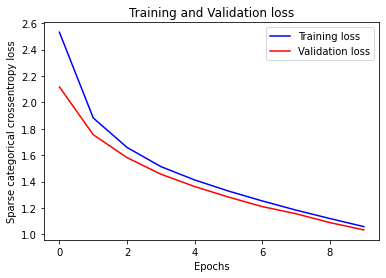

In [ ]:
plot_loss(EPOCHS, loss_train, loss_val)

##### 10.1.9. Inference
1.   The evaluate function is similar to the training loop, except we don't use teacher forcing here. The input to the decoder at each time step is its previous predictions along with the hidden state and the encoder output.
2.   Stop predicting when the model predicts the end token.

In [ ]:
## Beam Search
def evaluate_beam(inputs, encoder, decoder, max_length_inp, max_length_targ, special_input=False, beam_index=3):
    """
      inputs type = numpy.ndarray 
      inputs shape = (1, max_length_inp)
    """

    if special_input:
      inputs = tf.zeros((1, max_length_inp), dtype=tf.dtypes.int32)
      sentence = 'All zeros'
    else:
      sentence = ''
      for i in inputs[0]:
          if i == 0: # break if post padding detected
              break
          sentence = sentence + id2word[i] + ' '
      inputs = tf.convert_to_tensor(inputs)

    start = [word2id['<start>']]
    
    # result[0][0] = index of the starting word
    # result[0][1] = probability of the word predicted
    result = [[start, 0.0]]

    enc_hidden = (tf.zeros((1, units)), tf.zeros((1, units)))
    enc_outputs = encoder(inputs, enc_hidden)
    enc_output = enc_outputs[0]
    enc_states = enc_outputs[1:]
    dec_state_h, dec_state_c = enc_states
    dec_input = tf.expand_dims([word2id['<start>']], 0)

    # (max_length_targ-1) because start token is already added in the result
    while len(result[0][0]) < (max_length_targ-1):
        temp = []
        for s in result:

          predictions, dec_state_h, dec_state_c = \
                      decoder(dec_input, (dec_state_h, dec_state_c), enc_output)

         
          
          # Getting the top <beam_index>(n) predictions
          word_preds = np.argsort(predictions[0])[-beam_index:]
          
          # creating a new list so as to put them via the model again
          for w in word_preds:       
            next_cap, prob = s[0][:], s[1]
            next_cap.append(w)
            prob += predictions[0][w]
            temp.append([next_cap, prob])
        result = temp
        # Sorting according to the probabilities
        result = sorted(result, reverse=False, key=lambda l: l[1])
        # Getting the top words
        result = result[-beam_index:]
        
        predicted_id = result[-1] # with Max Probability
        pred_list = predicted_id[0]
        
        prd_id = pred_list[-1] 

        if(prd_id!=word2id['<end>']):
          dec_input = tf.expand_dims([prd_id], 0)  # Decoder input is the word predicted with highest probability among the top_k words predicted
        else:
          break

    result = result[-1][0]
    
    intermediate_result = [id2word[i] for i in result]
    
    final_result = []
    for i in intermediate_result:
        if i != '<end>':
            final_result.append(i)
        else:
            break

    
    final_result = ' '.join(final_result[1:])
    return final_result, sentence

In [ ]:
## Greedy Search
def evaluate(inputs, encoder, decoder, max_length_inp, max_length_targ, special_input=False):
    """
      inputs type = numpy.ndarray 
      inputs shape = (1, max_length_inp)
    """
    if special_input:
      inputs = tf.zeros((1, max_length_inp), dtype=tf.dtypes.int32)
      sentence = 'All zeros'
    else:
      sentence = ''
      for i in inputs[0]:
          if i == 0: # break if post padding detected
              break
          sentence = sentence + id2word[i] + ' '
      inputs = tf.convert_to_tensor(inputs)
    
    result = ''
    enc_hidden = (tf.zeros((1, units)), tf.zeros((1, units)))
    enc_outputs = encoder(inputs, enc_hidden)
    enc_output = enc_outputs[0]
    enc_states = enc_outputs[1:]
    dec_state_h, dec_state_c = enc_states

    dec_input = tf.expand_dims([word2id['<start>']], 0)
    for t in range(max_length_targ): # limit the length of the decoded sequence
        predictions, dec_state_h, dec_state_c = \
                      decoder(dec_input, (dec_state_h, dec_state_c), enc_output)
        predicted_id = tf.argmax(predictions[0]).numpy()
        result += id2word[predicted_id] + ' '
        if id2word[predicted_id] == '<end>':
            return result, sentence
        dec_input = tf.expand_dims([predicted_id], 0)
    return result, sentence

In [ ]:
def process(str):
  str = str.replace('<start>','')
  str = str.replace('<end>','')
  return str.strip()

def predict(encoder, decoder, dataset_input, dataset_output, mode, count=10, first_half=True, special_input=False, beam_search=False):   
  start = 0

  if mode == 'random':
    end = count
  elif mode == 'corpus':
    end = len(dataset_input)
    predicted_answer_list = list()
    actual_answer_list = list()
  elif mode == 'debug':
    question_list = list()
    predicted_answer_list = list()
    actual_answer_list = list()
    if first_half:
      end = int(len(dataset_input)/2)
    else:
      start = int(len(dataset_input)/2)
      end = len(dataset_input)

  
  for j in tqdm(range(start, end)):
      actual_ans = ''
      if mode == 'random':
        k = np.random.randint(len(dataset_input))
        random_input = dataset_input[k]
        random_output = dataset_output[k]
      elif mode == 'corpus' or mode == 'debug':
        random_input = dataset_input[j]
        random_output = dataset_output[j]

      random_input = np.expand_dims(random_input, 0)
      if beam_search:
         predicted_ans, ques = evaluate_beam(random_input, encoder, decoder, max_ques_length, max_ans_length, special_input=special_input)
      else:
        predicted_ans, ques = evaluate(random_input, encoder, decoder, max_ques_length, max_ans_length, special_input=special_input)
      for i in random_output:
          if i == 0: # break if post padding detected
            break
          actual_ans = actual_ans + id2word[i] + ' '
      
      if mode == 'debug':
        question_list.append(process(ques))
        predicted_answer_list.append(process(predicted_ans))
        actual_answer_list.append(process(actual_ans))

      if mode == 'random':  
        print()
        print('Question: {}'.format(process(ques)))
        print('Actual answer: {}'.format(process(actual_ans)))
        print('Predicted answer: {}'.format(process(predicted_ans)))
      elif mode == 'corpus': 
        hypothesis = process(predicted_ans).split(' ')
        reference = process(actual_ans).split(' ')
        references = [reference] # list of references for 1 sentence.
        actual_answer_list.append(references) # list of references for all sentences in corpus.
        predicted_answer_list.append(hypothesis) # list of hypotheses that corresponds to list of references.
        

  if mode == 'debug':
    return question_list, predicted_answer_list, actual_answer_list
  elif mode == 'corpus':
    return predicted_answer_list, actual_answer_list
  elif mode == 'random':
    return

##### 10.1.10. Restore the latest checkpoint and test

In [ ]:
# restoring the latest checkpoint in checkpoint_dir
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

###### 10.1.10.1. Inference using greedy search

In [ ]:
predict(encoder, decoder, enc_in_test, dec_in_test, 'random')

100%|██████████| 10/10 [00:00<00:00, 53.51it/s]


Question: is this color white of grey
Actual answer: it is grey
Predicted answer: yes

Question: does it have an extra outlet feature
Actual answer: no extra outlet
Predicted answer: yes

Question: what model number is it thanks
Actual answer: sx733
Predicted answer: a1428

Question: is this item compatible with a model hr44 700
Actual answer: yes
Predicted answer: yes

Question: does it come with warranty
Actual answer: no
Predicted answer: yes

Question: will this fit a rossi or taurus 98
Actual answer: yes
Predicted answer: yes

Question: wich material is made it
Actual answer: it is plastic
Predicted answer: plastic

Question: does paper come with it
Actual answer: yes
Predicted answer: no

Question: can the stand be removed to mount it on a wall
Actual answer: yes
Predicted answer: yes

Question: how long is the supplied cord
Actual answer: 3 feet
Predicted answer: about 6 feet


In [ ]:
predict(encoder, decoder, enc_in_test, dec_in_test, 'random', count=1, special_input=True)

100%|██████████| 1/1 [00:00<00:00, 53.05it/s]


Question: All zeros
Actual answer: yes
Predicted answer: yes


In [ ]:
start_time = timer()
predicted_answer_list, actual_answer_list = predict(encoder, decoder, enc_in_test, dec_in_test, 'corpus')
timer(start_time)

100%|██████████| 1069/1069 [00:16<00:00, 64.09it/s]

Time taken: 0 hours 0 minutes and 16.68 seconds.


###### 10.1.10.2. Inference with beam search

In [ ]:
predict(encoder, decoder, enc_in_test, dec_in_test, 'random', beam_search=True)

  0%|          | 0/10 [00:00<?, ?it/s]


Question: is there a slide lock
Actual answer: yes there is
Predicted answer: no


 30%|███       | 3/10 [00:00<00:00, 22.68it/s]


Question: is it lamented
Actual answer: no
Predicted answer: no

Question: how many bbs does the mag hold
Actual answer: 500 round capacity
Predicted answer: 2

Question: is it work with both 110v and 220v
Actual answer: yes
Predicted answer: no

Question: how tall are these dividers 2 3 4
Actual answer: 2 1 2
Predicted answer: 3


 60%|██████    | 6/10 [00:00<00:00, 22.58it/s]


Question: how many tags are included in this order
Actual answer: 4
Predicted answer: one


100%|██████████| 10/10 [00:00<00:00, 22.49it/s]


Question: is this brushwork men only
Actual answer: what is brushwork
Predicted answer: yes

Question: how much ram does it have
Actual answer: 4 gb
Predicted answer: 2gb

Question: metal
Actual answer: yes metal
Predicted answer: yes

Question: this work with computer to tv
Actual answer: no just phone
Predicted answer: yes


In [ ]:
predict(encoder, decoder, enc_in_test, dec_in_test, 'random', count=1, special_input=True, beam_search=True)

100%|██████████| 1/1 [00:00<00:00, 21.28it/s]


Question: All zeros
Actual answer: 120
Predicted answer: yes


In [ ]:
start_time = timer()
predicted_answer_list, actual_answer_list = predict(encoder, decoder, enc_in_test, dec_in_test, 'corpus', beam_search=True)
timer(start_time)

100%|██████████| 1069/1069 [00:45<00:00, 23.63it/s]

Time taken: 0 hours 0 minutes and 45.25 seconds.


##### 10.1.11. Calculate BLEU Score

###### 10.1.11.1. With greedy search inference

In [ ]:
start_time = timer()
print('BLEU-1: %f' % corpus_bleu(actual_answer_list, predicted_answer_list, weights=(1.0, 0, 0, 0)))
print('BLEU-2: %f' % corpus_bleu(actual_answer_list, predicted_answer_list, weights=(0.5, 0.5, 0, 0)))
print('BLEU-3: %f' % corpus_bleu(actual_answer_list, predicted_answer_list, weights=(0.3, 0.3, 0.3, 0)))
print('BLEU-4: %f' % corpus_bleu(actual_answer_list, predicted_answer_list, weights=(0.25, 0.25, 0.25, 0.25)))
timer(start_time)

/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BLEU-1: 0.281552
BLEU-2: 0.079612
BLEU-3: 0.048143
BLEU-4: 0.075227
Time taken: 0 hours 0 minutes and 0.16 seconds.


###### 10.1.11.2. With beam search inference

In [ ]:
start_time = timer()
print('BLEU-1: %f' % corpus_bleu(actual_answer_list, predicted_answer_list, weights=(1.0, 0, 0, 0)))
print('BLEU-2: %f' % corpus_bleu(actual_answer_list, predicted_answer_list, weights=(0.5, 0.5, 0, 0)))
print('BLEU-3: %f' % corpus_bleu(actual_answer_list, predicted_answer_list, weights=(0.3, 0.3, 0.3, 0)))
print('BLEU-4: %f' % corpus_bleu(actual_answer_list, predicted_answer_list, weights=(0.25, 0.25, 0.25, 0.25)))
timer(start_time)

/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BLEU-1: 0.203690
BLEU-2: 0.296788
BLEU-3: 0.345014
BLEU-4: 0.358249
Time taken: 0 hours 0 minutes and 0.16 seconds.


##### 10.1.12. TensorBoard

In [ ]:
# Code to zip the logs
!zip -rqq logs.zip logs

In [ ]:
# Code to download logs zip
try:
  from google.colab import files
except ImportError:
   pass
else:
  files.download('logs.zip')

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs/gradient_tape/20200718-162358/baseline/

#### 10.2. Baseline Model with Masking

##### 10.2.1. Create a tf.data dataset

In [ ]:
# Use code cell from 10.1.1.

##### 10.2.2. Write the encoder and decoder model

In [ ]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
        super(Encoder, self).__init__()
        self.batch_sz = batch_sz
        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim, 
                                                   input_length=max_ques_length, 
                                                   weights=[embedding_matrix], 
                                                   trainable=False, mask_zero=True)
        self.lstm = tf.keras.layers.LSTM(self.enc_units,
                                   return_sequences=True,
                                   return_state=True)
        
    def call(self, inputs, hidden):
        # inputs shape == (batch_size, max_ques_length)
        x = self.embedding(inputs)
        # x shape == (batch_size, max_ques_length, embedding_dim)
        mask = self.embedding.compute_mask(inputs)
        # mask shape == (batch_size, max_ques_length)
        output, state_h, state_c = self.lstm(x, initial_state=hidden, mask=mask)
        # output shape == (batch_size, max_ques_length, enc_units)
        # state_h shape == (batch_size, enc_units)
        # state_c shape == (batch_size, enc_units)
        return output, state_h, state_c

    def initialize_hidden_state(self):
        return (tf.zeros((self.batch_sz, self.enc_units)),
                tf.zeros((self.batch_sz, self.enc_units)))

class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
        super(Decoder, self).__init__()
        self.batch_sz = batch_sz
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim, 
                                                   input_length=max_ans_length, 
                                                   weights=[embedding_matrix], 
                                                   trainable=False, mask_zero=True)
        self.lstm = tf.keras.layers.LSTM(self.dec_units,
                                   return_sequences=True,
                                   return_state=True)
        self.fc = tf.keras.layers.Dense(vocab_size)
        
    def call(self, inputs, hidden, enc_output):
        # inputs shape == (batch_size, 1)
        # hidden shape == tuple of two (batch_size, enc_units)
        # enc_output shape == (batch_size, max_ques_length, enc_units)

        # x shape after passing through embedding and masking == (batch_size, 1, embedding_dim)
        x = self.embedding(inputs)
        mask = self.embedding.compute_mask(inputs)
        # mask shape == (batch_size, 1)
        
        # passing the concatenated vector to the LSTM
        output, state_h, state_c = self.lstm(x, initial_state=hidden, mask=mask)
        # output shape == (batch_size, 1, dec_units)
        # state_h shape == (batch_size, dec_units)
        # state_c shape == (batch_size, dec_units)
 
        output = tf.reshape(output, (-1, output.shape[2]))
        # output shape == (batch_size * 1, dec_units)
        
        x = self.fc(output)
        # output shape == (batch_size, vocab)
        
        return x, state_h, state_c

        
    def initialize_hidden_state(self):
        return (tf.zeros((self.batch_sz, self.dec_units)),
                tf.zeros((self.batch_sz, self.dec_units)))

In [ ]:
encoder = Encoder(qa_vocab_size, embedding_dim, units, BATCH_SIZE)

# sample input
sample_hidden = encoder.initialize_hidden_state()
sample_output, sample_state_hidden, sample_state_cell = encoder(example_input_batch, sample_hidden)
print ('Encoder output shape: (batch size, sequence length, units) {}'.format(sample_output.shape))
print ('Encoder hidden state shape: (batch size, units) {}'.format(sample_state_hidden.shape))
print ('Encoder cell state shape: (batch size, units) {}'.format(sample_state_cell.shape))

Encoder output shape: (batch size, sequence length, units) (512, 11, 1024)
Encoder hidden state shape: (batch size, units) (512, 1024)
Encoder cell state shape: (batch size, units) (512, 1024)


In [ ]:
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        multiple                  12419100  
_________________________________________________________________
lstm (LSTM)                  multiple                  5427200   
Total params: 17,846,300
Trainable params: 5,427,200
Non-trainable params: 12,419,100
_________________________________________________________________


In [ ]:
decoder = Decoder(qa_vocab_size, embedding_dim, units, BATCH_SIZE)

sample_decoder_output, _, _ = decoder(tf.random.uniform((BATCH_SIZE, 1)),
                                      sample_hidden, sample_output)

print ('Decoder output shape: (batch_size, vocab size) {}'.format(sample_decoder_output.shape))

Decoder output shape: (batch_size, vocab size) (512, 41397)


In [ ]:
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      multiple                  12419100  
_________________________________________________________________
lstm_1 (LSTM)                multiple                  5427200   
_________________________________________________________________
dense (Dense)                multiple                  42431925  
Total params: 60,278,225
Trainable params: 47,859,125
Non-trainable params: 12,419,100
_________________________________________________________________


##### 10.2.3. Define the optimizer and the loss function

In [ ]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask
  return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

##### 10.2.4. Checkpoints (Object-based saving)

In [ ]:
checkpoint_dir = './baseline_mask_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)

##### 10.2.5. Setup TensorBoard logging

In [ ]:
if not os.path.exists('logs'):
  os.makedirs('logs')

In [ ]:
current_time = datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = 'logs/gradient_tape/' + current_time + '/baseline_mask'
summary_writer = tf.summary.create_file_writer(log_dir)

##### 10.2.6. Training


In [ ]:
@tf.function
def train_step(inp, targ, enc_hidden):
  loss = 0

  with tf.GradientTape() as tape:
    enc_outputs = encoder(inp, enc_hidden)

    enc_output = enc_outputs[0]

    enc_states = enc_outputs[1:]

    dec_state_h, dec_state_c = enc_states

    dec_input = tf.expand_dims([word2id['<start>']] * BATCH_SIZE, 1)

    # Teacher forcing - feeding the target as the next input
    for t in range(1, targ.shape[1]):
      # passing enc_output to the decoder
      predictions, dec_state_h, dec_state_c = \
                      decoder(dec_input, (dec_state_h, dec_state_c), enc_output)

      loss += loss_function(targ[:, t], predictions)

      # using teacher forcing
      dec_input = tf.expand_dims(targ[:, t], 1)

  batch_loss = (loss / int(targ.shape[1]))

  variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, variables)

  optimizer.apply_gradients(zip(gradients, variables))

  return batch_loss

In [ ]:
EPOCHS = 10

In [ ]:
# train function defined in code cells of 10.1.6.

In [ ]:
start_time = timer()
loss_train, loss_val = train(EPOCHS)
timer(start_time)

----- Training -----
Epoch 1 Batch 0 Loss 8.5038
Epoch 1 Batch 100 Loss 2.3414
Epoch 1 Batch 200 Loss 2.2563
Epoch 1 Batch 300 Loss 2.0175
Epoch 1 Loss 2.4611
Time taken: 0 hours 1 minutes and 44.43 seconds.
----- Validation -----
Epoch 1 Batch 0 Val-Loss 2.0161
Epoch 1 Batch 40 Val-Loss 1.9703
Epoch 1 Batch 80 Val-Loss 2.0853
Epoch 1 Val-Loss 1.9649
Time taken: 0 hours 0 minutes and 23.63 seconds.
----- Training -----
Epoch 2 Batch 0 Loss 1.9365
Epoch 2 Batch 100 Loss 1.8856
Epoch 2 Batch 200 Loss 1.7784
Epoch 2 Batch 300 Loss 1.7213
Epoch 2 Loss 1.7898
Time taken: 0 hours 1 minutes and 34.03 seconds.
----- Validation -----
Epoch 2 Batch 0 Val-Loss 1.7267
Epoch 2 Batch 40 Val-Loss 1.5795
Epoch 2 Batch 80 Val-Loss 1.5434
Epoch 2 Val-Loss 1.6866
Time taken: 0 hours 0 minutes and 23.57 seconds.
----- Training -----
Epoch 3 Batch 0 Loss 1.6393
Epoch 3 Batch 100 Loss 1.6722
Epoch 3 Batch 200 Loss 1.5774
Epoch 3 Batch 300 Loss 1.5980
Epoch 3 Loss 1.6022
Time taken: 0 hours 1 minutes and 34.

##### 10.2.7. Save model weights

In [ ]:
encoder.save_weights('baseline_mask_encoder_weights.h5')
decoder.save_weights('baseline_mask_decoder_weights.h5')

In [ ]:
!tar cvzf baseline_mask_checkpoints.tar.gz ./baseline_mask_checkpoints/checkpoint ./baseline_mask_checkpoints/ckpt-1.data-00000-of-00001 ./baseline_mask_checkpoints/ckpt-1.index ./baseline_mask_encoder_weights.h5 ./baseline_mask_decoder_weights.h5

./baseline_mask_checkpoints/checkpoint
./baseline_mask_checkpoints/ckpt-1.data-00000-of-00001
./baseline_mask_checkpoints/ckpt-1.index
./baseline_mask_encoder_weights.h5
./baseline_mask_decoder_weights.h5


##### 10.2.8. Plot the model's loss

In [ ]:
# plot_loss function defined in 10.1.8.

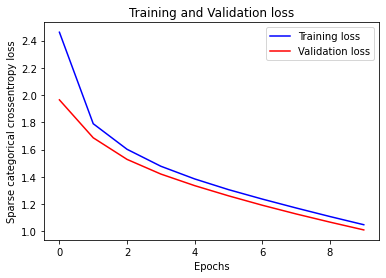

In [ ]:
plot_loss(EPOCHS, loss_train, loss_val)

##### 10.2.9. Inference


In [ ]:
# Use code cells of 10.1.9.

##### 10.2.10. Restore the latest checkpoint and test

In [ ]:
# restoring the latest checkpoint in checkpoint_dir
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

###### 10.2.10.1. Inference with greedy search

In [ ]:
predict(encoder, decoder, enc_in_test, dec_in_test, 'random')

 50%|█████     | 5/10 [00:00<00:00, 44.29it/s]


Question: which chelating agent is is edta eddha
Actual answer: it is eddha
Predicted answer: amg

Question: has the watch software to pc
Actual answer: nope
Predicted answer: yes

Question: is it 220 volt
Actual answer: 240
Predicted answer: yes

Question: would this fit in hyundai eon
Actual answer: yes
Predicted answer: yes

Question: is it 220 volt
Actual answer: 240
Predicted answer: yes

Question: i wanted to know if the item is dual voltage
Actual answer: no
Predicted answer: yes

Question: are these bottles really made with glass than you
Actual answer: yes
Predicted answer: yes

Question: is it 4 5 mm or 5 5 mm
Actual answer: 5 5mm
Predicted answer: 3 8

Question: can this fit on 8 year old
Actual answer: yes
Predicted answer: yes


100%|██████████| 10/10 [00:00<00:00, 39.78it/s]


Question: how small does it fold up
Actual answer: 7 x4 roughly
Predicted answer: about 15 inches


In [ ]:
predict(encoder, decoder, enc_in_test, dec_in_test, 'random', count=1, special_input=True)

100%|██████████| 1/1 [00:00<00:00, 16.09it/s]


Question: All zeros
Actual answer: yes
Predicted answer: yes


In [ ]:
start_time = timer()
predicted_answer_list, actual_answer_list = predict(encoder, decoder, enc_in_test, dec_in_test, 'corpus')
timer(start_time)

100%|██████████| 1069/1069 [00:22<00:00, 46.85it/s]

Time taken: 0 hours 0 minutes and 22.82 seconds.


###### 10.2.10.2. Inference with beam search

In [ ]:
predict(encoder, decoder, enc_in_test, dec_in_test, 'random', beam_search=True)

  0%|          | 0/10 [00:00<?, ?it/s]


Question: will this work on an atwood 8520 iv
Actual answer: yes
Predicted answer: yes


 50%|█████     | 5/10 [00:00<00:00, 20.01it/s]


Question: is this 32 bit or 64 bit i need 32 bit
Actual answer: 64 bit
Predicted answer: 64

Question: does it have a disk player
Actual answer: no disc player
Predicted answer: yes

Question: are the switches relay driven or hard wired to the plugs
Actual answer: hard wired
Predicted answer: they

Question: is this caffeinated
Actual answer: yes it is
Predicted answer: no

Question: what size primary jets is 1407 eldebrock carb
Actual answer: 098
Predicted answer: full


100%|██████████| 10/10 [00:00<00:00, 20.45it/s]


Question: is there a size xsmall
Actual answer: small medium
Predicted answer: yes

Question: will this work for a kawasaki jd 1996 engine fe 290das08
Actual answer: yes
Predicted answer: yes

Question: does this have an hdmi port
Actual answer: yes
Predicted answer: yes

Question: is it lamented
Actual answer: no
Predicted answer: yes


In [ ]:
predict(encoder, decoder, enc_in_test, dec_in_test, 'random', count=1, special_input=True, beam_search=True)

100%|██████████| 1/1 [00:00<00:00, 15.65it/s]


Question: All zeros
Actual answer: yes
Predicted answer: yes


In [ ]:
start_time = timer()
predicted_answer_list, actual_answer_list = predict(encoder, decoder, enc_in_test, dec_in_test, 'corpus', beam_search=True)
timer(start_time)

100%|██████████| 1069/1069 [00:50<00:00, 21.00it/s]

Time taken: 0 hours 0 minutes and 50.9 seconds.


##### 10.2.11. Calculate BLEU Score

###### 10.2.11.1. With greedy search inference

In [ ]:
start_time = timer()
print('BLEU-1: %f' % corpus_bleu(actual_answer_list, predicted_answer_list, weights=(1.0, 0, 0, 0)))
print('BLEU-2: %f' % corpus_bleu(actual_answer_list, predicted_answer_list, weights=(0.5, 0.5, 0, 0)))
print('BLEU-3: %f' % corpus_bleu(actual_answer_list, predicted_answer_list, weights=(0.3, 0.3, 0.3, 0)))
print('BLEU-4: %f' % corpus_bleu(actual_answer_list, predicted_answer_list, weights=(0.25, 0.25, 0.25, 0.25)))
timer(start_time)

/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BLEU-1: 0.260386
BLEU-2: 0.047829
BLEU-3: 0.020671
BLEU-4: 0.036751
Time taken: 0 hours 0 minutes and 0.16 seconds.


###### 10.2.11.2. With beam search inference

In [ ]:
start_time = timer()
print('BLEU-1: %f' % corpus_bleu(actual_answer_list, predicted_answer_list, weights=(1.0, 0, 0, 0)))
print('BLEU-2: %f' % corpus_bleu(actual_answer_list, predicted_answer_list, weights=(0.5, 0.5, 0, 0)))
print('BLEU-3: %f' % corpus_bleu(actual_answer_list, predicted_answer_list, weights=(0.3, 0.3, 0.3, 0)))
print('BLEU-4: %f' % corpus_bleu(actual_answer_list, predicted_answer_list, weights=(0.25, 0.25, 0.25, 0.25)))
timer(start_time)

/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BLEU-1: 0.200704
BLEU-2: 0.294351
BLEU-3: 0.343076
BLEU-4: 0.356468
Time taken: 0 hours 0 minutes and 0.14 seconds.


##### 10.2.12. TensorBoard

In [ ]:
# Code to zip the logs
!zip -rqq logs.zip logs

In [ ]:
# Code to download logs zip
try:
  from google.colab import files
except ImportError:
   pass
else:
  files.download('logs.zip')

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs/gradient_tape/20200720-042440/baseline_mask/

#### 10.3. Attention Model with Masking

##### 10.3.1. Create a tf.data dataset

In [ ]:
# Use code cells of 10.1.1.

##### 10.3.2. Write the encoder and decoder model

###### 10.3.2.1. Custom Masking Layer

In [ ]:
class CustomMaskingLayer(tf.keras.layers.Layer):
    def __init__(self, mask_zero=False, **kwargs):
        super(CustomMaskingLayer, self).__init__(**kwargs)
        self.mask_zero = mask_zero

    def compute_mask(self, inputs, mask=None):
        if not self.mask_zero:
            return None
        return tf.not_equal(inputs, 0.0)

In [ ]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
        super(Encoder, self).__init__()
        self.batch_sz = batch_sz
        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim, 
                                                   input_length=max_ques_length, 
                                                   weights=[embedding_matrix], 
                                                   trainable=False, mask_zero=True)
        self.lstm = tf.keras.layers.LSTM(self.enc_units,
                                   return_sequences=True,
                                   return_state=True)
        
    def call(self, inputs, hidden):
        # inputs shape == (batch_size, max_ques_length)
        x = self.embedding(inputs)
        # x shape == (batch_size, max_ques_length, embedding_dim)
        mask = self.embedding.compute_mask(inputs)
        # mask shape == (batch_size, max_ques_length)
        output, state_h, state_c = self.lstm(x, initial_state=hidden, mask=mask)
        # output shape == (batch_size, max_ques_length, enc_units)
        # state_h shape == (batch_size, enc_units)
        # state_c shape == (batch_size, enc_units)
        return output, state_h, state_c

    def initialize_hidden_state(self):
        return (tf.zeros((self.batch_sz, self.enc_units)),
                tf.zeros((self.batch_sz, self.enc_units)))

class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
        super(Decoder, self).__init__()
        self.batch_sz = batch_sz
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim, 
                                                   input_length=max_ans_length, 
                                                   weights=[embedding_matrix], 
                                                   trainable=False, mask_zero=True)
        
        self.lstm = tf.keras.layers.LSTM(self.dec_units,
                                   return_sequences=True,
                                   return_state=True)
        self.fc = tf.keras.layers.Dense(vocab_size)
        self.attention = tf.keras.layers.AdditiveAttention()

        self.masking_hidden = CustomMaskingLayer(mask_zero=True)
        self.masking_enc_ouput = CustomMaskingLayer(mask_zero=True)
        
    def call(self, inputs, hidden, enc_output):
        # inputs shape == (batch_size, 1)
        # hidden shape == tuple of two (batch_size, enc_units)
        # enc_output shape == (batch_size, max_ques_length, enc_units)

        hidden_with_time_axis = tf.expand_dims(hidden[0], 1)
        # hidden_with_time_axis shape == (batch_size, 1, enc_units)
        
        mask_hidden = self.masking_hidden(hidden_with_time_axis[:,:,0])
        hidden_with_time_axis_mask = self.masking_hidden.compute_mask(mask_hidden)

        
        # hidden_with_time_axis_mask shape == (batch_size, 1)
        
        mask_enc_output = self.masking_enc_ouput(enc_output[:,:,0])
        enc_output_mask = self.masking_enc_ouput.compute_mask(mask_enc_output)
        
        # enc_output_mask shape == (batch_size, max_ques_length)
        
        
        context_vector = self.attention(inputs=[hidden_with_time_axis, enc_output],
                                        mask=[hidden_with_time_axis_mask, enc_output_mask])
        
        # context_vector shape == (batch_size, 1, enc_units)

        
        # x shape after passing through embedding == (batch_size, 1, embedding_dim)
        x = self.embedding(inputs)
        
        mask = self.embedding.compute_mask(inputs)
        # mask shape == (batch_size, 1)

        # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
        x = tf.concat([context_vector, x], axis=-1)
        
        # passing the concatenated vector to the LSTM
        output, state_h, state_c = self.lstm(x, initial_state=hidden, mask=mask)
        # output shape == (batch_size, 1, dec_units)
        # state_h shape == (batch_size, dec_units)
        # state_c shape == (batch_size, dec_units)
 
        output = tf.reshape(output, (-1, output.shape[2]))
        # output shape == (batch_size * 1, dec_units)
        
        x = self.fc(output)
        # output shape == (batch_size, vocab)
        
        return x, state_h, state_c

    def initialize_hidden_state(self):
        return (tf.zeros((self.batch_sz, self.dec_units)),
                tf.zeros((self.batch_sz, self.dec_units)))

In [ ]:
encoder = Encoder(qa_vocab_size, embedding_dim, units, BATCH_SIZE)

# sample input
sample_hidden = encoder.initialize_hidden_state()
sample_output, sample_state_hidden, sample_state_cell = encoder(example_input_batch, sample_hidden)
print ('Encoder output shape: (batch size, sequence length, units) {}'.format(sample_output.shape))
print ('Encoder hidden state shape: (batch size, units) {}'.format(sample_state_hidden.shape))
print ('Encoder cell state shape: (batch size, units) {}'.format(sample_state_cell.shape))

Encoder output shape: (batch size, sequence length, units) (512, 11, 1024)
Encoder hidden state shape: (batch size, units) (512, 1024)
Encoder cell state shape: (batch size, units) (512, 1024)


In [ ]:
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        multiple                  12419100  
_________________________________________________________________
lstm (LSTM)                  multiple                  5427200   
Total params: 17,846,300
Trainable params: 5,427,200
Non-trainable params: 12,419,100
_________________________________________________________________


In [ ]:
decoder = Decoder(qa_vocab_size, embedding_dim, units, BATCH_SIZE)

sample_decoder_output, _, _ = decoder(tf.random.uniform((BATCH_SIZE, 1)),
                                      sample_hidden, sample_output)

print ('Decoder output shape: (batch_size, vocab size) {}'.format(sample_decoder_output.shape))

Decoder output shape: (batch_size, vocab size) (512, 41397)


In [ ]:
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      multiple                  12419100  
_________________________________________________________________
lstm_1 (LSTM)                multiple                  9621504   
_________________________________________________________________
dense (Dense)                multiple                  42431925  
_________________________________________________________________
additive_attention (Additive multiple                  1024      
_________________________________________________________________
custom_masking_layer (Custom multiple                  0         
_________________________________________________________________
custom_masking_layer_1 (Cust multiple                  0         
Total params: 64,473,553
Trainable params: 52,054,453
Non-trainable params: 12,419,100
______________________________________

###### 10.3.2.2. tf.keras.layers.Masking Layer

In [ ]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
        super(Encoder, self).__init__()
        self.batch_sz = batch_sz
        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim, 
                                                   input_length=max_ques_length, 
                                                   weights=[embedding_matrix], 
                                                   trainable=False, mask_zero=True)
        self.lstm = tf.keras.layers.LSTM(self.enc_units,
                                   return_sequences=True,
                                   return_state=True)
        
    def call(self, inputs, hidden):
        # inputs shape == (batch_size, max_ques_length)
        x = self.embedding(inputs)
        # x shape == (batch_size, max_ques_length, embedding_dim)
        mask = self.embedding.compute_mask(inputs)
        # mask shape == (batch_size, max_ques_length)
        output, state_h, state_c = self.lstm(x, initial_state=hidden, mask=mask)
        # output shape == (batch_size, max_ques_length, enc_units)
        # state_h shape == (batch_size, enc_units)
        # state_c shape == (batch_size, enc_units)
        return output, state_h, state_c

    def initialize_hidden_state(self):
        return (tf.zeros((self.batch_sz, self.enc_units)),
                tf.zeros((self.batch_sz, self.enc_units)))

class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
        super(Decoder, self).__init__()
        self.batch_sz = batch_sz
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim, 
                                                   input_length=max_ans_length, 
                                                   weights=[embedding_matrix], 
                                                   trainable=False, mask_zero=True)
        
        self.lstm = tf.keras.layers.LSTM(self.dec_units,
                                   return_sequences=True,
                                   return_state=True)
        self.fc = tf.keras.layers.Dense(vocab_size)
        self.attention = tf.keras.layers.AdditiveAttention()

        self.masking_hidden = tf.keras.layers.Masking()
        self.masking_enc_output = tf.keras.layers.Masking()
        
    def call(self, inputs, hidden, enc_output):
        # inputs shape == (batch_size, 1)
        # hidden shape == tuple of two (batch_size, enc_units)
        # enc_output shape == (batch_size, max_ques_length, enc_units)

        hidden_with_time_axis = tf.expand_dims(hidden[0], 1)
        # hidden_with_time_axis shape == (batch_size, 1, enc_units)
        
        hidden_with_time_axis_mask = self.masking_hidden(hidden_with_time_axis)
        # hidden_with_time_axis_mask._keras_mask shape == (batch_size, 1)
        
        enc_output_mask = self.masking_enc_output(enc_output)
        # enc_output_mask._keras_mask shape == (batch_size, max_ques_length)
        
        context_vector = self.attention(inputs=[hidden_with_time_axis, enc_output],
                                        mask=[hidden_with_time_axis_mask._keras_mask, enc_output_mask._keras_mask])
        # context_vector shape == (batch_size, 1, enc_units)

        
        # x shape after passing through embedding == (batch_size, 1, embedding_dim)
        x = self.embedding(inputs)

        mask = self.embedding.compute_mask(inputs)
        # mask shape == (batch_size, 1)

        # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
        x = tf.concat([context_vector, x], axis=-1)
        
        # passing the concatenated vector to the LSTM
        output, state_h, state_c = self.lstm(x, initial_state=hidden, mask=mask)
        # output shape == (batch_size, 1, dec_units)
        # state_h shape == (batch_size, dec_units)
        # state_c shape == (batch_size, dec_units)
 
        output = tf.reshape(output, (-1, output.shape[2]))
        # output shape == (batch_size * 1, dec_units)
        
        x = self.fc(output)
        # output shape == (batch_size, vocab)
        
        return x, state_h, state_c

    def initialize_hidden_state(self):
        return (tf.zeros((self.batch_sz, self.dec_units)),
                tf.zeros((self.batch_sz, self.dec_units)))

In [ ]:
encoder = Encoder(qa_vocab_size, embedding_dim, units, BATCH_SIZE)

# sample input
sample_hidden = encoder.initialize_hidden_state()
sample_output, sample_state_hidden, sample_state_cell = encoder(example_input_batch, sample_hidden)
print ('Encoder output shape: (batch size, sequence length, units) {}'.format(sample_output.shape))
print ('Encoder hidden state shape: (batch size, units) {}'.format(sample_state_hidden.shape))
print ('Encoder cell state shape: (batch size, units) {}'.format(sample_state_cell.shape))

Encoder output shape: (batch size, sequence length, units) (512, 11, 1024)
Encoder hidden state shape: (batch size, units) (512, 1024)
Encoder cell state shape: (batch size, units) (512, 1024)


In [ ]:
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        multiple                  12419100  
_________________________________________________________________
lstm (LSTM)                  multiple                  5427200   
Total params: 17,846,300
Trainable params: 5,427,200
Non-trainable params: 12,419,100
_________________________________________________________________


In [ ]:
decoder = Decoder(qa_vocab_size, embedding_dim, units, BATCH_SIZE)

sample_decoder_output, _, _ = decoder(tf.random.uniform((BATCH_SIZE, 1)),
                                      sample_hidden, sample_output)

print ('Decoder output shape: (batch_size, vocab size) {}'.format(sample_decoder_output.shape))

Decoder output shape: (batch_size, vocab size) (512, 41397)


In [ ]:
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      multiple                  12419100  
_________________________________________________________________
lstm_1 (LSTM)                multiple                  9621504   
_________________________________________________________________
dense (Dense)                multiple                  42431925  
_________________________________________________________________
additive_attention (Additive multiple                  1024      
_________________________________________________________________
masking (Masking)            multiple                  0         
_________________________________________________________________
masking_1 (Masking)          multiple                  0         
Total params: 64,473,553
Trainable params: 52,054,453
Non-trainable params: 12,419,100
______________________________________

##### 10.3.3. Define the optimizer and the loss function

###### 10.3.3.1. Custom Masking Layer

In [ ]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask
  return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

###### 10.3.3.2. tf.keras.layers.Masking Layer

In [ ]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask
  return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

##### 10.3.4. Checkpoints (Object-based saving)

###### 10.3.4.1. Custom Masking Layer

In [ ]:
checkpoint_dir = './attention_one_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)

###### 10.3.4.2. tf.keras.layers.Masking Layer

In [ ]:
checkpoint_dir = './attention_two_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)

##### 10.3.5. Setup TensorBoard logging

In [ ]:
if not os.path.exists('logs'):
  os.makedirs('logs')

###### 10.3.5.1. Custom Masking Layer

In [ ]:
current_time = datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = 'logs/gradient_tape/' + current_time + '/attention_one'
summary_writer = tf.summary.create_file_writer(log_dir)

###### 10.3.5.2. tf.keras.layers.Masking Layer

In [ ]:
current_time = datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = 'logs/gradient_tape/' + current_time + '/attention_two'
summary_writer = tf.summary.create_file_writer(log_dir)

##### 10.3.6. Training


In [ ]:
EPOCHS = 10

In [ ]:
# train function is defined in 10.1.6.

###### 10.3.6.1. Custom Masking Layer

In [ ]:
@tf.function
def train_step(inp, targ, enc_hidden):
  loss = 0

  with tf.GradientTape() as tape:
    enc_outputs = encoder(inp, enc_hidden)

    enc_output = enc_outputs[0]

    enc_states = enc_outputs[1:]

    dec_state_h, dec_state_c = enc_states

    dec_input = tf.expand_dims([word2id['<start>']] * BATCH_SIZE, 1)

    # Teacher forcing - feeding the target as the next input
    for t in range(1, targ.shape[1]):
      # passing enc_output to the decoder
      predictions, dec_state_h, dec_state_c = \
                      decoder(dec_input, (dec_state_h, dec_state_c), enc_output)

      loss += loss_function(targ[:, t], predictions)

      # using teacher forcing
      dec_input = tf.expand_dims(targ[:, t], 1)

  batch_loss = (loss / int(targ.shape[1]))

  variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, variables)

  optimizer.apply_gradients(zip(gradients, variables))

  return batch_loss

In [ ]:
start_time = timer()
loss_train, loss_val = train(EPOCHS)
timer(start_time)

----- Training -----
Epoch 1 Batch 0 Loss 8.5055
Epoch 1 Batch 100 Loss 2.6240
Epoch 1 Batch 200 Loss 2.3223
Epoch 1 Batch 300 Loss 2.1641
Epoch 1 Loss 2.5454
Time taken: 0 hours 1 minutes and 55.45 seconds.
----- Validation -----
Epoch 1 Batch 0 Val-Loss 2.0912
Epoch 1 Batch 40 Val-Loss 2.2105
Epoch 1 Batch 80 Val-Loss 2.1711
Epoch 1 Val-Loss 2.1598
Time taken: 0 hours 0 minutes and 25.95 seconds.
----- Training -----
Epoch 2 Batch 0 Loss 2.0315
Epoch 2 Batch 100 Loss 1.8984
Epoch 2 Batch 200 Loss 2.0149
Epoch 2 Batch 300 Loss 1.9631
Epoch 2 Loss 1.9329
Time taken: 0 hours 1 minutes and 44.04 seconds.
----- Validation -----
Epoch 2 Batch 0 Val-Loss 1.7362
Epoch 2 Batch 40 Val-Loss 1.8448
Epoch 2 Batch 80 Val-Loss 1.6969
Epoch 2 Val-Loss 1.7679
Time taken: 0 hours 0 minutes and 26.13 seconds.
----- Training -----
Epoch 3 Batch 0 Loss 1.7871
Epoch 3 Batch 100 Loss 1.6353
Epoch 3 Batch 200 Loss 1.6599
Epoch 3 Batch 300 Loss 1.6539
Epoch 3 Loss 1.6505
Time taken: 0 hours 1 minutes and 44.

###### 10.3.6.2. tf.keras.layers.Masking Layer

In [ ]:
@tf.function
def train_step(inp, targ, enc_hidden):
  loss = 0

  with tf.GradientTape() as tape:
    enc_outputs = encoder(inp, enc_hidden)

    enc_output = enc_outputs[0]

    enc_states = enc_outputs[1:]

    dec_state_h, dec_state_c = enc_states

    dec_input = tf.expand_dims([word2id['<start>']] * BATCH_SIZE, 1)

    # Teacher forcing - feeding the target as the next input
    for t in range(1, targ.shape[1]):
      # passing enc_output to the decoder
      predictions, dec_state_h, dec_state_c = \
                      decoder(dec_input, (dec_state_h, dec_state_c), enc_output)

      loss += loss_function(targ[:, t], predictions)

      # using teacher forcing

  batch_loss = (loss / int(targ.shape[1]))

  variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, variables)

  optimizer.apply_gradients(zip(gradients, variables))

  return batch_loss

In [ ]:
start_time = timer()
loss_train, loss_val = train(EPOCHS)
timer(start_time)

----- Training -----
Epoch 1 Batch 0 Loss 8.5053
Epoch 1 Batch 100 Loss 2.5622
Epoch 1 Batch 200 Loss 2.5031
Epoch 1 Batch 300 Loss 2.1383
Epoch 1 Loss 2.5956
Time taken: 0 hours 1 minutes and 56.64 seconds.
----- Validation -----
Epoch 1 Batch 0 Val-Loss 2.0893
Epoch 1 Batch 40 Val-Loss 2.3307
Epoch 1 Batch 80 Val-Loss 2.2090
Epoch 1 Val-Loss 2.2740
Time taken: 0 hours 0 minutes and 26.38 seconds.
----- Training -----
Epoch 2 Batch 0 Loss 2.2812
Epoch 2 Batch 100 Loss 2.3082
Epoch 2 Batch 200 Loss 2.0478
Epoch 2 Batch 300 Loss 1.9882
Epoch 2 Loss 2.1038
Time taken: 0 hours 1 minutes and 45.82 seconds.
----- Validation -----
Epoch 2 Batch 0 Val-Loss 2.0731
Epoch 2 Batch 40 Val-Loss 1.8414
Epoch 2 Batch 80 Val-Loss 2.0027
Epoch 2 Val-Loss 1.9693
Time taken: 0 hours 0 minutes and 26.5 seconds.
----- Training -----
Epoch 3 Batch 0 Loss 1.9082
Epoch 3 Batch 100 Loss 1.8855
Epoch 3 Batch 200 Loss 1.8200
Epoch 3 Batch 300 Loss 1.9009
Epoch 3 Loss 1.8905
Time taken: 0 hours 1 minutes and 46.9

##### 10.3.7. Save model weights

###### 10.3.7.1. Custom Masking Layer

In [ ]:
encoder.save_weights('attention_one_encoder_weights.h5')
decoder.save_weights('attention_one_decoder_weights.h5')

In [ ]:
!tar cvzf attention_one_checkpoints.tar.gz ./attention_one_checkpoints/checkpoint ./attention_one_checkpoints/ckpt-1.data-00000-of-00001 ./attention_one_checkpoints/ckpt-1.index ./attention_one_encoder_weights.h5 ./attention_one_decoder_weights.h5

./attention_one_checkpoints/checkpoint
./attention_one_checkpoints/ckpt-1.data-00000-of-00001
./attention_one_checkpoints/ckpt-1.index
./attention_one_encoder_weights.h5
./attention_one_decoder_weights.h5


###### 10.3.7.2. tf.keras.layers.Masking Layer

In [ ]:
encoder.save_weights('attention_two_encoder_weights.h5')
decoder.save_weights('attention_two_decoder_weights.h5')

In [ ]:
!tar cvzf attention_two_checkpoints.tar.gz ./attention_two_checkpoints/checkpoint ./attention_two_checkpoints/ckpt-1.data-00000-of-00001 ./attention_two_checkpoints/ckpt-1.index ./attention_two_encoder_weights.h5 ./attention_two_decoder_weights.h5

./attention_two_checkpoints/checkpoint
./attention_two_checkpoints/ckpt-1.data-00000-of-00001
./attention_two_checkpoints/ckpt-1.index
./attention_two_encoder_weights.h5
./attention_two_decoder_weights.h5


In [ ]:
!tar xvzf checkpoints.tar.gz ./attention_two_checkpoints

./attention_two_checkpoints/checkpoint
./attention_two_checkpoints/ckpt-15.data-00000-of-00001
./attention_two_checkpoints/ckpt-15.index


##### 10.3.8. Plot the model's loss

In [ ]:
# plot_loss function is defined in 10.1.8.

###### 10.3.8.1. Custom Masking Layer

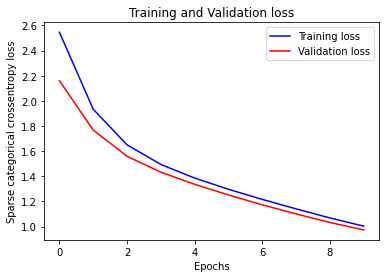

In [ ]:
plot_loss(EPOCHS, loss_train, loss_val)

###### 10.3.8.2. tf.keras.layers.Masking Layer

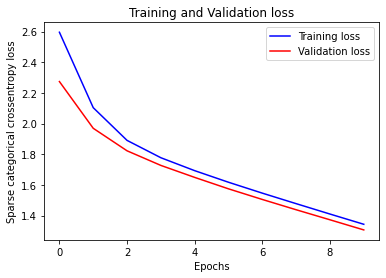

In [ ]:
plot_loss(EPOCHS, loss_train, loss_val)

##### 10.3.9. Inference


In [ ]:
# Use code cells of 10.1.9.

##### 10.3.10. Restore the latest checkpoint and test (Custom Masking Layer)

In [ ]:
# restoring the latest checkpoint in checkpoint_dir
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

###### 10.3.10.1. Inference with greedy search

In [ ]:
predict(encoder, decoder, enc_in_test, dec_in_test, 'random')

 70%|███████   | 7/10 [00:00<00:00, 27.09it/s]


Question: which bey does it come with
Actual answer: torch aries
Predicted answer: the the flute

Question: is her dress a two piece
Actual answer: no
Predicted answer: yes

Question: how far apart are the wood slats
Actual answer: abiut 8 inches
Predicted answer: about 4 inches

Question: will it work with sony google tv nsx 32gt1
Actual answer: yes
Predicted answer: yes

Question: do you have extended warranty for 3 years
Actual answer: no
Predicted answer: yes

Question: does this work on epson expression xp 211
Actual answer: sorry not yet
Predicted answer: yes

Question: does it work on 220 volt
Actual answer: no
Predicted answer: no


100%|██████████| 10/10 [00:00<00:00, 32.01it/s]


Question: how many shields come in the package
Actual answer: one
Predicted answer: one

Question: hi i can run photoshop ilustrator corel
Actual answer: yes
Predicted answer: yes

Question: streaming amazon movies
Actual answer: yes
Predicted answer: yes


In [ ]:
predict(encoder, decoder, enc_in_test, dec_in_test, 'random', count=1, special_input=True)

100%|██████████| 1/1 [00:00<00:00, 21.14it/s]


Question: All zeros
Actual answer: not sure
Predicted answer: yes


In [ ]:
start_time = timer()
predicted_answer_list, actual_answer_list = predict(encoder, decoder, enc_in_test, dec_in_test, 'corpus')
timer(start_time)

100%|██████████| 1069/1069 [00:27<00:00, 38.42it/s]

Time taken: 0 hours 0 minutes and 27.83 seconds.


###### 10.3.10.2. Inference with beam search

In [ ]:
predict(encoder, decoder, enc_in_test, dec_in_test, 'random', beam_search=True)

  0%|          | 0/10 [00:00<?, ?it/s]


Question: i have 2007 nissan versa will this work for me
Actual answer: yes
Predicted answer: yes


 40%|████      | 4/10 [00:00<00:00, 16.63it/s]


Question: does this battery work in the d3300
Actual answer: yes
Predicted answer: yes

Question: what is the length of the hose
Actual answer: 5 ft long
Predicted answer: about

Question: does it work with skype on the pc
Actual answer: yes
Predicted answer: yes

Question: is this compatible with the igroove model no 1000330
Actual answer: yes
Predicted answer: yes


 80%|████████  | 8/10 [00:00<00:00, 16.75it/s]


Question: is this an original oem samsung product
Actual answer: yes it is
Predicted answer: yes

Question: are the saw mounting brackets included
Actual answer: yes they were
Predicted answer: yes

Question: is it peel seel
Actual answer: no
Predicted answer: yes

Question: does this model come with a storage case
Actual answer: noe
Predicted answer: no


100%|██████████| 10/10 [00:00<00:00, 16.81it/s]


Question: would this module be compatibile with 2014 mercedes benz c250w
Actual answer: yes
Predicted answer: yes


In [ ]:
predict(encoder, decoder, enc_in_test, dec_in_test, 'random', count=1, special_input=True, beam_search=True)

100%|██████████| 1/1 [00:00<00:00, 12.94it/s]


Question: All zeros
Actual answer: yes
Predicted answer: yes


In [ ]:
start_time = timer()
predicted_answer_list, actual_answer_list = predict(encoder, decoder, enc_in_test, dec_in_test, 'corpus', beam_search=True)
timer(start_time)

100%|██████████| 1069/1069 [01:00<00:00, 17.56it/s]

Time taken: 0 hours 1 minutes and 0.9 seconds.


##### 10.3.11. Restore the latest checkpoint and test (tf.keras.layers.Masking Layer)

In [ ]:
# restoring the latest checkpoint in checkpoint_dir
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

###### 10.3.11.1. Inference with greedy search

In [ ]:
predict(encoder, decoder, enc_in_test, dec_in_test, 'random')

 80%|████████  | 8/10 [00:00<00:00, 37.05it/s]


Question: how many cups dry rice
Actual answer: for what
Predicted answer: 8

Question: ship to brazil
Actual answer: yes
Predicted answer: yes

Question: does it play cd dvd
Actual answer: yes
Predicted answer: yes

Question: are the handles removable
Actual answer: no
Predicted answer: yes

Question: will it also work with a left hand exployer
Actual answer: yes
Predicted answer: yes

Question: will it even work with a 18 55mm kit lens
Actual answer: absolutely
Predicted answer: yes

Question: how far down does it hang from the ceiling
Actual answer: 12 from ceiling
Predicted answer: about inches inches

Question: do the fingers break
Actual answer: no
Predicted answer: yes


100%|██████████| 10/10 [00:00<00:00, 36.41it/s]


Question: does this unit have a fan
Actual answer: no
Predicted answer: yes

Question: where does it made
Actual answer: made in china
Predicted answer: china


In [ ]:
predict(encoder, decoder, enc_in_test, dec_in_test, 'random', count=1, special_input=True)

100%|██████████| 1/1 [00:00<00:00, 23.24it/s]


Question: All zeros
Actual answer: yes
Predicted answer: yes


In [ ]:
start_time = timer()
predicted_answer_list, actual_answer_list = predict(encoder, decoder, enc_in_test, dec_in_test, 'corpus')
timer(start_time)

100%|██████████| 1069/1069 [00:25<00:00, 41.76it/s]

Time taken: 0 hours 0 minutes and 25.6 seconds.


###### 10.3.11.2. Inference with beam search

In [ ]:
predict(encoder, decoder, enc_in_test, dec_in_test, 'random', beam_search=True, count=10)

  0%|          | 0/10 [00:00<?, ?it/s]


Question: is the black on black a shiny glossy black
Actual answer: no
Predicted answer: yes


 40%|████      | 4/10 [00:00<00:00, 17.73it/s]


Question: can it fit about 8 plants inside 7 gal pots
Actual answer: yea no problem
Predicted answer: yes

Question: does it have 4 wheels
Actual answer: yes 4 wheels
Predicted answer: yes

Question: how deep is it
Actual answer: 20 inches
Predicted answer: about

Question: what size are the nipples for the coolant hose
Actual answer: 5 8
Predicted answer: 1


 80%|████████  | 8/10 [00:00<00:00, 18.01it/s]


Question: can i connect via bluetooth
Actual answer: no bluetooth available
Predicted answer: yes

Question: what is the capacity of this carafe
Actual answer: approximately 8 cups
Predicted answer: 2

Question: do we use filter for this coffee maker
Actual answer: i do
Predicted answer: yes

Question: does this come with a monitor the description says 15 inches
Actual answer: no
Predicted answer: yes


100%|██████████| 10/10 [00:00<00:00, 17.91it/s]


Question: is the 3year warranty parts and labor included in this price
Actual answer: yes
Predicted answer: yes


In [ ]:
predict(encoder, decoder, enc_in_test, dec_in_test, 'random', count=1, special_input=True, beam_search=True)

100%|██████████| 1/1 [00:00<00:00, 13.52it/s]


Question: All zeros
Actual answer: no
Predicted answer: yes


In [ ]:
start_time = timer()
predicted_answer_list, actual_answer_list = predict(encoder, decoder, enc_in_test, dec_in_test, 'corpus', beam_search=True)
timer(start_time)

100%|██████████| 1069/1069 [00:59<00:00, 17.85it/s]

Time taken: 0 hours 0 minutes and 59.89 seconds.


##### 10.3.12. Calculate BLEU Score (Custom Masking Layer)

###### 10.3.12.1. With greedy search inference

In [ ]:
start_time = timer()
print('BLEU-1: %f' % corpus_bleu(actual_answer_list, predicted_answer_list, weights=(1.0, 0, 0, 0)))
print('BLEU-2: %f' % corpus_bleu(actual_answer_list, predicted_answer_list, weights=(0.5, 0.5, 0, 0)))
print('BLEU-3: %f' % corpus_bleu(actual_answer_list, predicted_answer_list, weights=(0.3, 0.3, 0.3, 0)))
print('BLEU-4: %f' % corpus_bleu(actual_answer_list, predicted_answer_list, weights=(0.25, 0.25, 0.25, 0.25)))
timer(start_time)

BLEU-1: 0.272969
BLEU-2: 0.060914
BLEU-3: 0.033846
BLEU-4: 0.055855
Time taken: 0 hours 0 minutes and 0.15 seconds.


/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


###### 10.3.12.2. With beam search inference

In [ ]:
start_time = timer()
print('BLEU-1: %f' % corpus_bleu(actual_answer_list, predicted_answer_list, weights=(1.0, 0, 0, 0)))
print('BLEU-2: %f' % corpus_bleu(actual_answer_list, predicted_answer_list, weights=(0.5, 0.5, 0, 0)))
print('BLEU-3: %f' % corpus_bleu(actual_answer_list, predicted_answer_list, weights=(0.3, 0.3, 0.3, 0)))
print('BLEU-4: %f' % corpus_bleu(actual_answer_list, predicted_answer_list, weights=(0.25, 0.25, 0.25, 0.25)))
timer(start_time)

/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BLEU-1: 0.203530
BLEU-2: 0.296417
BLEU-3: 0.344518
BLEU-4: 0.357717
Time taken: 0 hours 0 minutes and 0.15 seconds.


##### 10.3.13. Calculate BLEU Score (tf.keras.layers.Masking Layer)

###### 10.3.13.1. With greedy search inference

In [ ]:
start_time = timer()
print('BLEU-1: %f' % corpus_bleu(actual_answer_list, predicted_answer_list, weights=(1.0, 0, 0, 0)))
print('BLEU-2: %f' % corpus_bleu(actual_answer_list, predicted_answer_list, weights=(0.5, 0.5, 0, 0)))
print('BLEU-3: %f' % corpus_bleu(actual_answer_list, predicted_answer_list, weights=(0.3, 0.3, 0.3, 0)))
print('BLEU-4: %f' % corpus_bleu(actual_answer_list, predicted_answer_list, weights=(0.25, 0.25, 0.25, 0.25)))
timer(start_time)

/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BLEU-1: 0.243275
BLEU-2: 0.028968
BLEU-3: 0.093048
BLEU-4: 0.124567
Time taken: 0 hours 0 minutes and 0.14 seconds.


###### 10.3.13.2. With beam search inference

In [ ]:
start_time = timer()
print('BLEU-1: %f' % corpus_bleu(actual_answer_list, predicted_answer_list, weights=(1.0, 0, 0, 0)))
print('BLEU-2: %f' % corpus_bleu(actual_answer_list, predicted_answer_list, weights=(0.5, 0.5, 0, 0)))
print('BLEU-3: %f' % corpus_bleu(actual_answer_list, predicted_answer_list, weights=(0.3, 0.3, 0.3, 0)))
print('BLEU-4: %f' % corpus_bleu(actual_answer_list, predicted_answer_list, weights=(0.25, 0.25, 0.25, 0.25)))
timer(start_time)

/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BLEU-1: 0.207569
BLEU-2: 0.299343
BLEU-3: 0.346555
BLEU-4: 0.359478
Time taken: 0 hours 0 minutes and 0.14 seconds.


##### 10.3.12. TensorBoard

In [ ]:
# Code to zip the logs
!zip -rqq logs.zip logs

In [ ]:
!tar cvzf logs.tar.gz logs/

logs/
logs/gradient_tape/
logs/gradient_tape/20200804-123625/
logs/gradient_tape/20200804-123625/baseline_mask/
logs/gradient_tape/20200804-123625/baseline_mask/events.out.tfevents.1596544585.6653b19621ce.196.1170266.v2
logs/gradient_tape/20200804-123625/baseline_mask/events.out.tfevents.1596550972.6653b19621ce.profile-empty
logs/gradient_tape/20200804-123625/baseline_mask/plugins/
logs/gradient_tape/20200804-123625/baseline_mask/plugins/profile/
logs/gradient_tape/20200804-123625/baseline_mask/plugins/profile/2020-08-04_14-22-52/
logs/gradient_tape/20200804-123625/baseline_mask/plugins/profile/2020-08-04_14-22-52/local.trace
logs/gradient_tape/20200804-162753/
logs/gradient_tape/20200804-162753/attention_two/
logs/gradient_tape/20200804-162753/attention_two/events.out.tfevents.1596565734.6653b19621ce.profile-empty
logs/gradient_tape/20200804-162753/attention_two/plugins/
logs/gradient_tape/20200804-162753/attention_two/plugins/profile/
logs/gradient_tape/20200804-162753/attention_two/

In [ ]:
# Code to download logs zip
try:
  from google.colab import files
except ImportError:
   pass
else:
  files.download('logs.zip')

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
%tensorboard --logdir logs/gradient_tape/20200719-064637/attention_one/

#### 11. Model inferencing

In [ ]:
!python ./src/main.py "Does this product come with any of the support tools or not?"

2020-08-04 19:32:18.441419: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-08-04 19:32:25.202700: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-08-04 19:32:25.208868: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-04 19:32:25.209408: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-08-04 19:32:25.209447: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-08-04 19:32:25.250280: I tensorflow/stream_executor/platform/default